# 
BIG doc start

## With some dependencies that you may need to install

## dont worry if you encounter some problems/errors, just make sure to download the dependencies:

- mediapipe
- opencv-python

##### Copyright 2023 The MediaPipe Authors. All Rights Reserved.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Hand Landmarks Detection with MediaPipe Tasks

This notebook shows you how to use MediaPipe Tasks Python API to detect hand landmarks from images.

## Preparation

Let's start with installing MediaPipe.

In [2]:
!pip install -q mediapipe

In [3]:
print("a")

a


In [4]:
!pip install opencv-python

Then download an off-the-shelf model bundle. Check out the [MediaPipe documentation](https://developers.google.com/mediapipe/solutions/vision/hand_landmarker#models) for more information about this model bundle.

In [5]:
!wget -q https://storage.googleapis.com/mediapipe-models/hand_landmarker/hand_landmarker/float16/1/hand_landmarker.task

'wget' n'est pas reconnu en tant que commande interne
ou externe, un programme ex‚cutable ou un fichier de commandes.


## Visualization utilities

In [6]:
#@markdown We implemented some functions to visualize the hand landmark detection results. <br/> Run the following cell to activate the functions.

from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np

MARGIN = 10  # pixels
FONT_SIZE = 1
FONT_THICKNESS = 1
HANDEDNESS_TEXT_COLOR = (88, 205, 54) # vibrant green

def draw_landmarks_on_image(rgb_image, detection_result):
  hand_landmarks_list = detection_result.hand_landmarks
  handedness_list = detection_result.handedness
  annotated_image = np.copy(rgb_image)

  # Loop through the detected hands to visualize.
  for idx in range(len(hand_landmarks_list)):
    hand_landmarks = hand_landmarks_list[idx]
    handedness = handedness_list[idx]

    # Draw the hand landmarks.
    hand_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    hand_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in hand_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      hand_landmarks_proto,
      solutions.hands.HAND_CONNECTIONS,
      solutions.drawing_styles.get_default_hand_landmarks_style(),
      solutions.drawing_styles.get_default_hand_connections_style())

    # Get the top left corner of the detected hand's bounding box.
    height, width, _ = annotated_image.shape
    x_coordinates = [landmark.x for landmark in hand_landmarks]
    y_coordinates = [landmark.y for landmark in hand_landmarks]
    text_x = int(min(x_coordinates) * width)
    text_y = int(min(y_coordinates) * height) - MARGIN

    # Draw handedness (left or right hand) on the image.
    cv2.putText(annotated_image, f"{handedness[0].category_name}",
                (text_x, text_y), cv2.FONT_HERSHEY_DUPLEX,
                FONT_SIZE, HANDEDNESS_TEXT_COLOR, FONT_THICKNESS, cv2.LINE_AA)

  return annotated_image

## Download test image

Let's grab a test image that we'll use later. The image is from [Unsplash](https://unsplash.com/photos/mt2fyrdXxzk).

In [7]:
!ls -l

'ls' n'est pas reconnu en tant que commande interne
ou externe, un programme ex‚cutable ou un fichier de commandes.


In [ ]:
!wget -q -O image.jpg https://storage.googleapis.com/mediapipe-tasks/hand_landmarker/woman_hands.jpg

In [9]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread("image.jpg")
cv2_imshow(img)

ModuleNotFoundError: No module named 'google.colab'

Optionally, you can upload your own image. If you want to do so, uncomment and run the cell below.

In [ ]:
# from google.colab import files
# uploaded = files.upload()

# for filename in uploaded:
#   content = uploaded[filename]
#   with open(filename, 'wb') as f:
#     f.write(content)

# if len(uploaded.keys()):
#   IMAGE_FILE = next(iter(uploaded))
#   print('Uploaded file:', IMAGE_FILE)

## Running inference and visualizing the results

Here are the steps to run hand landmark detection using MediaPipe.

Check out the [MediaPipe documentation](https://developers.google.com/mediapipe/solutions/vision/hand_landmarker/python) to learn more about configuration options that this solution supports.


In [ ]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 2: Create an HandLandmarker object.
base_options = python.BaseOptions(model_asset_path='hand_landmarker.task')
options = vision.HandLandmarkerOptions(base_options=base_options,
                                       num_hands=2)
detector = vision.HandLandmarker.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file("image.jpg")

# STEP 4: Detect hand landmarks from the input image.
detection_result = detector.detect(image)

# STEP 5: Process the classification result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
cv2_imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))

# End of the big doc start

# below is some stuff if you work on google collab

## you may want to know the fact that you can't do it on kaggle

## to do what you may ask: use you personal camera and the website (google collab/ kaggle) 

In [19]:
print("a")

a


In [30]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

# ============================================================================

# Alright things are getting serious as we finally start what we doing

In [15]:
def produit_scalaire(v1, v2):
    return np.dot(v1, v2)

def norme(v):
    return np.linalg.norm(v)

def calcul_angle(v1, v2):
    dot_product = produit_scalaire(v1, v2)
    norm_v1 = norme(v1)
    norm_v2 = norme(v2)

    cos_theta = dot_product / (norm_v1 * norm_v2)
    
    angle_radians = np.arccos(cos_theta)
    angle_degrees = np.degrees(angle_radians)
    
    return angle_degrees

def angle_entre_droites(points1, points2):
    A, B, C = points1
    A_prime, B_prime, C_prime = points2
    
    v1 = B - A
    v2 = C - B
    
    v3 = B_prime - A_prime
    v4 = C_prime - B_prime
    
    angle = calcul_angle(v1, v3)
    
    return angle

In [16]:
points1 = np.array([(0, 2), (0, 4), (0, 6)])  # Trois points pour la première droite
points2 = np.array([(2,0), (4, 0), (6, 0)])  # Trois points pour la deuxième droite

angle = angle_entre_droites(points1, points2)
print(f"L'angle entre les deux droites est de {angle:.2f} degrés.")

L'angle entre les deux droites est de 90.00 degrés.


## Angle

In [17]:

def angle_bw_3points(a,b,c): 
    ba = a - b
    bc = c - b
    
    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    angle = np.arccos(cosine_angle)
    return np.degrees(angle)
    

In [18]:
a=np.array([0,1])
b=np.array([0,0])
c=np.array([1,0])
print(angle_bw_3points(a,b,c))

a=np.array([0.5,0.5])
b=np.array([0,0])
c=np.array([1,0])
print(angle_bw_3points(a,b,c))

90.0
45.00000000000001


In [19]:
def anyNan(l):
    return nan in l
    

In [20]:
print(anyNan([nan]), 
      anyNan([0,1,2,nan]),
      anyNan([]),
      anyNan([1]))

NameError: name 'nan' is not defined

In [21]:
def compute_angles(image, landmarks):
    #print("LANDMARKS\n", landmarks,"\n======================================\n", "landmarks[5]\n",landmarks[5])
    index_angle = angle_bw_3points( np.array(landmarks[2]), np.array(landmarks[4]),  np.array(np.array(landmarks[2], landmarks[8])))
    middle_angle = angle_bw_3points(np.array(landmarks[5]), np.array(landmarks[8]),  np.array(np.array(landmarks[5], landmarks[12])))
    ring_angle = angle_bw_3points(  np.array(landmarks[9]), np.array(landmarks[12]), np.array(np.array(landmarks[9], landmarks[16])))
    pinky_angle = angle_bw_3points( np.array(landmarks[13]), np.array(landmarks[16]), np.array(np.array(landmarks[13], landmarks[20])))
    angles = [index_angle, middle_angle, ring_angle, pinky_angle]

    if anyNan(angles):
        cv2.putText(image, f'NaN', landmarks[6], 
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2, cv2.LINE_AA)    
        return []
    return angles
    

In [22]:
def display_angles(image, landmarks, angles):
    if (not angles) or (anyNan(angles)):
        print("NaN")
        return
    for angle in angles:
        if math.isnan(angle):
            print("NaN")
            return
    cv2.putText(image, f'{int(angles[0])}°', landmarks[6], 
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2, cv2.LINE_AA)
    cv2.putText(image, f'{int(angles[1])}°', landmarks[10], 
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2, cv2.LINE_AA)
    cv2.putText(image, f'{int(angles[2])}°', landmarks[14], 
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2, cv2.LINE_AA)
    cv2.putText(image, f'{int(angles[3])}°', landmarks[18], 
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2, cv2.LINE_AA)
    print("angles[0]\n",angles[0],"\nangles[1]\n",angles[1],"\nangles[2]\n",angles[2],"\nangles[3]\n",angles[3])

In [23]:
def comp_disp_keypoints(image, frame, hand_landmarks, keypoint):
    h, w, _ = image.shape
    for i, landmark in enumerate(hand_landmarks.landmark):
        x, y = int(landmark.x * w), int(landmark.y * h)  # Conversion en pixels
        if keypoint:
            cv2.putText(image , str(i), (x, y), cv2.FONT_HERSHEY_SIMPLEX, 
                            0.4, (0, 255, 0), 1, cv2.LINE_AA)  

In [24]:
def df_create_frame_data(frame_data, image,frame_idx, hand_landmarks):
    h, w, _ = image.shape
    for i, lm in enumerate(hand_landmarks.landmark):
        #coordonné relative
        norm_pos = np.array([lm.x, lm.y, lm.z])
        #coordonnées réelles
        real_pos = np.array([lm.x * w, lm.y * h, lm.z])
    
        frame_data[f"Keypoint {i} (Camera Relative)"] = norm_pos
        frame_data[f"Keypoint {i} (Real World)"] = real_pos
    return frame_data

def df_create_frame_data(frames_data,columns, image, frame_idx, montreal_tz, start_time, hand_landmarks):
    h, w, _ = image.shape
    relative_positions = []
    real_positions = []
    relative_time = time.time() - start_time
    absolute_time = datetime.now(montreal_tz).strftime('%Y-%m-%d %H:%M:%S.%f')

    for i, lm in enumerate(hand_landmarks.landmark):

        relative_positions.append([lm.x, lm.y, lm.z])
        real_positions.append([lm.x * w, lm.y * h, lm.z])

        frames_data.append([frame_idx, relative_time, absolute_time, relative_positions, real_positions])
    


# Bam your hand detector

**Remarques:**

 - Différencier le numero de l'index et le numéro de la frame:

           l'index est le nombre de frames dont une main a été détecté (+1)
           et le numéro de la frame est la n{ieme} frame par rapport au début de la video
   
       exemple:
           Si au début de la vidéo, aucune main n'est présente, la vidéo continue de tourner et le nombre de frame auguemente, mais ces derniers
           (les frames) ne sont pas présente dans les données.
           Plus tard, si l'on place une main devant la caméra, et qu'elle est détectée, alors une frame s'ajoute à nos données.

- Comment Mediapipe callibre l'espace afin de nous donner une position reelle du monde ?

          apparemment c'eest une IA + dautre truc, rien de tres concret.
            C'est à dire que la position est (si jai bien compris) dynnamiquement (pendant qu'on film)

# Functions to calculate some data

## Speed

In [25]:
previous_positions = {} 
previous_time = time.time() 

In [26]:
def calculate_speed(current_positions):
    global previous_positions, previous_time

    current_time = time.time()
    dt = current_time - previous_time 
    speeds = {}

    if dt > 0:
        for key, current_pos in current_positions.items():
            if key in previous_positions:
                dx = current_pos[0] - previous_positions[key][0]
                dy = current_pos[1] - previous_positions[key][1]
                distance = np.sqrt(dx**2 + dy**2)
                speed = distance / dt 
                speeds[key] = speed

    previous_positions = current_positions
    previous_time = current_time
    return speeds

In [27]:
# test
positions_main = {
    "Index_Tip": (150, 300),
    "Middle_Tip": (160, 310)
}

speed_data = calculate_speed(positions_main)
print(speed_data) 

{}


# Benchmarck

## Store the data

In [28]:
df = pd.DataFrame([
    {"finger": "index", "angle": 45.6, "speed": 5.2},
    {"finger": "middle", "angle": 30.2, "speed": 4.8}
])

df.to_csv("benchmark_piano.csv", index=False)


## display the data

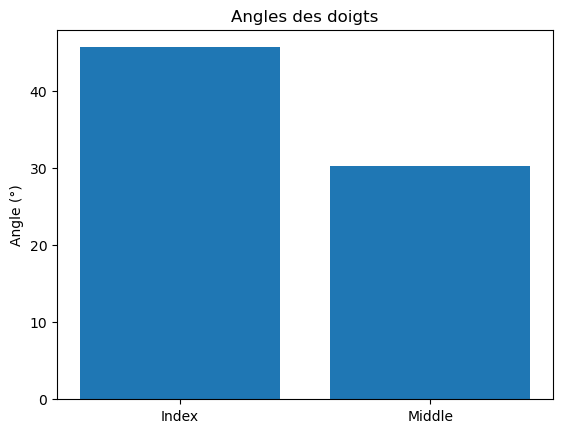

In [29]:
angles = [45.6, 30.2]
labels = ["Index", "Middle"]

plt.bar(labels, angles)
plt.ylabel("Angle (°)")
plt.title("Angles des doigts")
plt.show()


In [30]:
import pandas as pd
import numpy as np

# Création du DataFrame avec colonnes imbriquées
columns = ['Frame', 'RTime', 'MTime']

# Ajouter 21 colonnes pour les keypoints (chacune contiendra un tuple)
columns += [("RePos", f"Keypt{i}") for i in range(21)]
columns += [("WoPos", f"Keypt{i}") for i in range(21)]
# Conversion en MultiIndex pour l'imbrication

df = pd.DataFrame(frames_data, columns=columns)


# Initialiser le DataFrame vide
frame_idx = 0
frames_data = []

for frame_idx in range(1111):  # Exemple avec 100 frames
    relative_time = frame_idx * 0.033  # Simulation d'une vidéo à ~30 FPS
    absolute_time = pd.Timestamp.now(tz="America/Montreal")  # Heure locale
    
    # Simulation des positions des keypoints
    relative_positions = [(np.random.random(), np.random.random(), np.random.random()) for _ in range(21)]
    real_positions = [(np.random.random()*10, np.random.random()*10, np.random.random()*10) for _ in range(21)]
    
    # Stocker les données
    row = [frame_idx, relative_time, absolute_time] + relative_positions + real_positions
    frames_data.append(row)

# Convertir en DataFrame


NameError: name 'frames_data' is not defined

In [31]:
display(df)

,finger,angle,speed
0,index,45.6000,5.2000
1,middle,30.2000,4.8000


In [99]:
import pandas as pd

# Création de données avec des colonnes imbriquées
data = {
    'Personne': ['Alice', 'Bob', 'Charlie'],
    'Détails': [
        {'Âge': 25, 'Ville': 'Paris'},
        {'Âge': 30, 'Ville': 'Lyon'},
        {'Âge': 22, 'Ville': 'Marseille'}
    ]
}

# Création du DataFrame
df = pd.DataFrame(data)

print(df)

  Personne                            Détails
0    Alice      {'Âge': 25, 'Ville': 'Paris'}
1      Bob       {'Âge': 30, 'Ville': 'Lyon'}
2  Charlie  {'Âge': 22, 'Ville': 'Marseille'}


In [100]:
# Accéder à l'âge de chaque personne
df['Âge'] = df['Détails'].apply(lambda x: x['Âge'])

print(df)


  Personne                            Détails  Âge
0    Alice      {'Âge': 25, 'Ville': 'Paris'}   25
1      Bob       {'Âge': 30, 'Ville': 'Lyon'}   30
2  Charlie  {'Âge': 22, 'Ville': 'Marseille'}   22


In [115]:
# incomes per person, inflation adjusted, US $ 2000, source World Bank
f = {'Argentina': [],
                        'Egypt': [],
                   'Mexico':[]
                  
                  }

In [112]:
df

,Argentina,Egypt


In [172]:
agentina = []
egypt = []
mexico = []

In [176]:


for  i in range (3):
    agentina.append(i * 1)
    egypt.append((i + 1)* 2)
    mexico.append(i * 10)

df = pd.DataFrame({"Am":{"a":agentina,"m":mexico},
                             "Af":{"e":egypt},
                             })


SyntaxError: closing parenthesis '}' does not match opening parenthesis '[' (4161841401.py, line 6)

In [177]:
df

,Am,Af
a,"[0, 1, 2]",NaN
m,"[0, 10, 20]",NaN
e,NaN,"[2, 4, 6]"


C:\Users\Administrateur\AppData\Local\Temp\ipykernel_30100\356097724.py:37: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([row_data], index=[frame_idx])])


In [ ]:
df

In [220]:
import numpy as np
import pandas as pd
import cv2
import time
import pytz
from datetime import datetime
import mediapipe as mp

def df_create_frame_data(frame_data, image, frame_idx, hand_landmarks):
    h, w, _ = image.shape
    
    # Initialiser des listes pour les positions relatives et absolues
    relative_positions = []
    absolute_positions = []

    # Remplir les listes avec les coordonnées des 21 keypoints
    for i, lm in enumerate(hand_landmarks.landmark):
        # Coordonnée relative (normalisée)
        norm_pos = np.array([lm.x, lm.y, lm.z])
        relative_positions.append(norm_pos)
        
        # Coordonnée absolue (en pixels)
        real_pos = np.array([lm.x * w, lm.y * h, lm.z])
        absolute_positions.append(real_pos)

    # Ajouter les données dans le frame_data sous forme de séries avec MultiIndex
    frame_data["Relative"] = pd.Series(relative_positions, index=[f"Keypoint {i}" for i in range(21)])
    frame_data["Absolute"] = pd.Series(absolute_positions, index=[f"Keypoint {i}" for i in range(21)])
    
    return frame_data

def capture(camera, keypoint=False, angle=False, video_output="output.avi", data_output="hand_tracking_data.csv"):
    # Initialisation
    mp_hands = mp.solutions.hands
    mp_drawing = mp.solutions.drawing_utils
    hands = mp_hands.Hands(min_detection_confidence=0.5, min_tracking_confidence=0.5)
    
    cap = cv2.VideoCapture(camera)
    
    # Initialiser DataFrame
    df = pd.DataFrame()
    frame_idx = 0
    
    # Fuseau horaire de Montréal
    montreal_tz = pytz.timezone("America/Toronto")
    start_time = time.time()  # Temps de départ pour la mesure relative

    # Enregistrement vidéo
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(video_output, fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))

    while cap.isOpened():
        success, frame = cap.read()
        if not success:
            continue
    
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = hands.process(image)

        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        h, w, _ = image.shape

        relative_time = time.time() - start_time
        absolute_time = datetime.now(montreal_tz).strftime('%Y-%m-%d %H:%M:%S.%f')
        
        # Détection des mains
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                # Initialiser les données pour le frame
                frame_data = {
                    "Frame": frame_idx,
                    "Relative Time (s)": relative_time,
                    "Montreal Time": absolute_time
                }
                
                # Ajouter les données des keypoints dans le frame_data
                frame_data = df_create_frame_data(frame_data, image, frame_idx, hand_landmarks)
                
                # Ajouter la nouvelle ligne dans le DataFrame avec MultiIndex
                df = pd.concat([df, pd.DataFrame([frame_data])], ignore_index=True)
                
                landmarks = [(int(lm.x * w), int(lm.y * h)) for lm in hand_landmarks.landmark]

                # Dessiner les landmarks sur l'image
                mp_drawing.draw_landmarks(image if keypoint else frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)
                comp_disp_keypoints(image, frame, hand_landmarks, keypoint)
                if angle:
                    angles = compute_angles(image, landmarks)
                    display_angles(image, landmarks, angles)

        # Affichage de l'image ou de la frame
        cv2.imshow('Hand Tracking with Landmarks', image if keypoint else frame)
        out.write(image if keypoint else frame)  # Enregistrer la vidéo
        frame_idx += 1
        
        # Quitter avec la touche 'q'
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    
    cap.release()
    out.release()
    cv2.destroyAllWindows()

    # Sauvegarder les données dans un fichier CSV
    df.to_csv(data_output, index=False)

    return df


In [231]:
df = capture(0)

In [ ]:
df

In [229]:
df["Relative"][0]["Keypoint 0"]

array([8.92295361e-01, 6.31264687e-01, 4.75104173e-07])

In [ ]:
df = capture(0)
display(df)

In [ ]:
df

In [270]:
import cv2
import mediapipe as mp
import pandas as pd
import numpy as np
import time
from datetime import datetime
import pytz

# Initialisation de Mediapipe Hands
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

# Définition des 21 keypoints
keypoints = [f"Keypoint {i}" for i in range(21)]

# Création du MultiIndex pour les colonnes
multi_columns = pd.MultiIndex.from_product(
    [["Left Hand", "Right Hand"], ["Relative Position", "Real Position"], keypoints],
    names=["Hand", "Type", "Keypoint"]
)

# Initialisation du DataFrame
df = pd.DataFrame(columns=["Frame", "Relative Time (s)", "Montreal Time"] + list(multi_columns))

# Capture vidéo et extraction des keypoints
def capture(camera=0, video_output="output.avi", data_output="hand_tracking_data.csv"):
    hands = mp_hands.Hands(
        static_image_mode=False, 
        max_num_hands=2, 
        min_detection_confidence=0.5, 
        min_tracking_confidence=0.5
    )

    cap = cv2.VideoCapture(camera)
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(video_output, fourcc, 30.0, (int(cap.get(3)), int(cap.get(4))))

    start_time = time.time()
    frames_data = []

    while cap.isOpened():
        success, frame = cap.read()
        if not success:
            break

        # Conversion en RGB (Mediapipe utilise ce format)
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = hands.process(image)
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # Temps
        relative_time = time.time() - start_time
        montreal_time = datetime.now(pytz.timezone('America/Montreal'))

        # Initialisation des données de la frame
        frame_data = {
            "Frame": len(frames_data),
            "Relative Time (s)": relative_time,
            "Montreal Time": montreal_time
        }

        # Traitement des mains détectées
        if results.multi_hand_landmarks and results.multi_handedness:
            for idx, hand_landmarks in enumerate(results.multi_hand_landmarks):
                label = results.multi_handedness[idx].classification[0].label
                hand_label = "Right Hand" if label == "Right" else "Left Hand"

                h, w, _ = frame.shape
                keypoints_relative = {}
                keypoints_real = {}

                for i, lm in enumerate(hand_landmarks.landmark):
                    keypoints_relative[f"Keypoint {i}"] = (lm.x, lm.y, lm.z)
                    keypoints_real[f"Keypoint {i}"] = (lm.x * w, lm.y * h, lm.z * 100)

                # Mise à jour du dictionnaire des données
                frame_data.update({(hand_label, "Relative Position", k): v for k, v in keypoints_relative.items()})
                frame_data.update({(hand_label, "Real Position", k): v for k, v in keypoints_real.items()})

                # Dessin des landmarks
                mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)

        # Ajout de la ligne au DataFrame
        frames_data.append(frame_data)
        
        # Enregistrement vidéo
        out.write(image)

        # Affichage
        cv2.imshow('Hand Tracking', image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    # Libération des ressources
    cap.release()
    out.release()
    cv2.destroyAllWindows()

    # Création du DataFrame final
    global df
    df = pd.DataFrame(frames_data)
    
    # Sauvegarde des données
    df.to_csv(data_output, index=False)
    return df

# Exécution de la capture
df = capture()


📁 Données enregistrées dans hand_tracking_data.csv
🎥 Vidéo enregistrée dans output.avi


In [ ]:
display(df)

# "triple dimension"

potentiellement les dataset sur lequel je fait faire mon benchmark:

- https://fouheylab.eecs.umich.edu/~dandans/projects/hands23/data/hands23_data.zip 

    |-> associated github: https://github.com/ddshan/hands23_data
- https://lmb.informatik.uni-freiburg.de/resources/datasets/FreihandDataset.en.html
    
    |-> have the dataset itself and the goundtruth in 2 differents compressed files and the github also is refereced in the website
  
    |-> associated github: https://github.com/lmb-freiburg/freihand

In [1]:
import cv2
import mediapipe as mp
import pandas as pd
import time
from datetime import datetime
import pytz
import json
import os
import numpy as np
import matplotlib.pyplot as plt
import moviepy
from moviepy import VideoFileClip, AudioFileClip
import sounddevice as sd
import soundfile as sf
#import pyzed.sl as sl #-> need sdk for the stereo camera

In [2]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

keypoints = [f"Keypoint {i}" for i in range(21)]

In [3]:
def comp_disp_keypoints(image, frame, hand_landmarks, keypoint):
    h, w, _ = image.shape
    for i, landmark in enumerate(hand_landmarks.landmark):
        x, y = int(landmark.x * w), int(landmark.y * h)  # Conversion en pixels
        if keypoint:
            cv2.putText(image , str(i), (x, y), cv2.FONT_HERSHEY_SIMPLEX, 
                            0.4, (0, 255, 0), 1, cv2.LINE_AA)  

In [4]:
def plot_hand_tracking(df):
    frames = df["Relative Time (s)"]
    fig, axes = plt.subplots(3, 2, figsize=(15, 10), sharex=True)
    fig.suptitle("Hand Tracking - Position des Keypoints", fontsize=16)

    colors = {"Left Hand": "blue", "Right Hand": "red"}

    for hand in ["Left Hand", "Right Hand"]:
        for coord, ax, title in zip(["x", "y", "z"], axes[:, 0 if hand == "Left Hand" else 1], ["X", "Y", "Z"]):
            for keypoint in [f"Keypoint {i}" for i in range(21)]:
                # Vérifier que la colonne existe et contient bien des tuples
               # if (hand, "Real Position", keypoint) in df.columns:
              #      data1 = df[(hand, "Real Position", keypoint)].apply(
             #           lambda t: t[0] if isinstance(t, tuple) and coord == "x" else
              #                    (t[1] if isinstance(t, tuple) and coord == "y" else
                #                   (t[2] if isinstance(t, tuple) else None))
                #    )
                if (hand, "Relative Position", keypoint) in df.columns:
                    data2 = df[(hand, "Relative Position", keypoint)].apply(
                        lambda t: t[0] if isinstance(t, tuple) and coord == "x" else
                                  (t[1] if isinstance(t, tuple) and coord == "y" else
                                   (t[2] if isinstance(t, tuple) else None))
                    )
                 #   ax.plot(frames, data1, label=keypoint, color=colors[hand], alpha=0.5)
                    
                    ax.plot(frames, data2, label=keypoint, color=colors[hand], alpha=0.5)

            ax.set_title(f"{hand} - {title} (Real Position)")
            ax.set_ylabel("Coordonnée")
            ax.legend(fontsize=6, loc="upper right")

    axes[2, 0].set_xlabel("Frames")
    axes[2, 1].set_xlabel("Frames")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [5]:
def easy_plot(df, keypoint_index=0, hand="Left Hand"):
    """
    Affiche les positions X, Y et Z d'un seul keypoint au cours du temps.

    Args:
        df (pd.DataFrame): Le DataFrame contenant les données de suivi de la main.
        keypoint_index (int, optional): L'index du keypoint à afficher (0-20). Par défaut 0.
        hand (str, optional): La main à afficher ("Left Hand" ou "Right Hand"). Par défaut "Left Hand".
    """

    frames = df["Relative Time (s)"]
    fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)
    fig.suptitle(f"Suivi du Keypoint {keypoint_index} de la {hand}", fontsize=16)

    colors = {"Left Hand": "blue", "Right Hand": "red"}
    coord_labels = {"x": "X", "y": "Y", "z": "Z"}
    coord_data = {}

    for coord in ["x", "y", "z"]:
        keypoint_col = (hand, "Relative Position", f"Keypoint {keypoint_index}")
        if keypoint_col in df.columns:
            coord_data[coord] = df[keypoint_col].apply(
                lambda t: t[0] if isinstance(t, tuple) and coord == "x" else
                (t[1] if isinstance(t, tuple) and coord == "y" else
                 (t[2] if isinstance(t, tuple) else None))
            )
            axes[list("xyz").index(coord)].plot(frames, coord_data[coord], label=f"{coord_labels[coord]}", color=colors[hand], alpha=0.7)
            axes[list("xyz").index(coord)].set_ylabel(f"Coordonnée {coord_labels[coord]}")
            axes[list("xyz").index(coord)].legend(loc="upper right")
        else:
            print(f"Colonne {keypoint_col} non trouvée dans le DataFrame.")
            return

    axes[2].set_xlabel("Temps (s)")  # Assuming 'frames' represents time

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [6]:
def initialize_capture(input_source, camera, file_path=None):
    if input_source == "live":
        return cv2.VideoCapture(camera), None  # Caméra en direct
    elif input_source == "video" and file_path:
        print(file_path)
        return cv2.VideoCapture(file_path), None  # Vidéo pré-enregistrée
    elif input_source == "image" and file_path:
        image = cv2.imread(file_path)
        if image is None:
            raise ValueError("Erreur: L'image spécifiée est introuvable.")
        return None, image  # Image statique
    else:
        raise ValueError("Erreur: Source d'entrée non valide.")

In [7]:
def process_frame(keypoints_data, frame, hands, frame_idx, start_time):
    image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = hands.process(image_rgb)

    image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR)

    # Temps relatif et heure de Montréal
    relative_time = time.time() - start_time
    montreal_time = datetime.now(pytz.timezone('America/Montreal'))

    frame_data = {
        "Frame": frame_idx,
        "Relative Time (s)": relative_time,
        "Montreal Time": montreal_time
    }

    if results.multi_hand_landmarks and results.multi_handedness:
        h, w, _ = frame.shape
        for idx, hand_landmarks in enumerate(results.multi_hand_landmarks):
            label = results.multi_handedness[idx].classification[0].label
            hand_label = "Right Hand" if label == "Right" else "Left Hand"

            keypoints_relative = {f"Keypoint {i}": (round(lm.x, 4), round(lm.y, 4), round(lm.z, 4))
                                  for i, lm in enumerate(hand_landmarks.landmark)}
            keypoints_real = {f"Keypoint {i}": (round(lm.x * w, 4), round(lm.y * h, 4), round(lm.z * 100, 4))
                              for i, lm in enumerate(hand_landmarks.landmark)}

            for keypoint in keypoints:
                frame_data[(hand_label, "Position", keypoint)] = keypoints_relative[keypoint]
                #frame_data[(hand_label, "Real Position", keypoint)] = keypoints_real[keypoint]
    
            blue_points = true_detect_blue_point(frame, keypoints_relative)
            for i, point in enumerate(blue_points):
                frame_data["Marker",i]= point
            mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
            if keypoints_data:
                comp_disp_keypoints(image, frame, hand_landmarks, keypoint)

    return image, frame_data, 


def capture(input_source="live", camera=0, file_path=None, keypoints_data=True, record_audio=False, audio_filename="enregistrement.wav"):
    try:
        cap, image = initialize_capture(input_source, camera, file_path)
    except ValueError as e:
        print(e)
        return None

    frames_data = []

    if cap is not None:
        fourcc = cv2.VideoWriter_fourcc(*'XVID')
        fps = cap.get(cv2.CAP_PROP_FPS)
        frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
        
        # dynamic output filename
        output_video_name = "output_video.avi"
        if input_source == "image" and file_path:
            output_video_name = os.path.splitext(os.path.basename(file_path))[0] + "_processed.avi"
        elif input_source == "video" and file_path:
            output_video_name = os.path.splitext(os.path.basename(file_path))[0] + "_processed.avi"

        out = cv2.VideoWriter(output_video_name, fourcc, fps, (frame_width, frame_height))

    hands = mp_hands.Hands(
        static_image_mode=False,
        max_num_hands=2,
        min_detection_confidence=0.5,
        min_tracking_confidence=0.5
    )

    start_time = time.time()
    frame_idx = 0

    # Enregistrement audio si record_audio est activé et input source est live
    if record_audio and input_source == "live":
        fs = 44100  # Fréquence d'échantillonnage
        print("Enregistrement audio en direct en cours...")
        audio_frames = []

        def callback(indata, frames, time, status):
            audio_frames.append(indata.copy())

        stream = sd.InputStream(callback=callback, samplerate=fs, channels=2)
        stream.start()

    while True:
        if input_source == "image":
            processed_image, frame_data = process_frame(keypoints_data, image, hands, frame_idx, start_time)
            frames_data.append(frame_data)
            cv2.imshow('Hand Tracking', processed_image)
            cv2.waitKey(0)

            cv2.imwrite(output_video_name, processed_image)
            break
        else:
            success, frame = cap.read()
            if not success:
                break

            processed_image, frame_data = process_frame(keypoints_data, frame, hands, frame_idx, start_time)
            frames_data.append(frame_data)

            out.write(processed_image)

            cv2.imshow('Hand Tracking', processed_image)
            wait_delay = int(1000 / fps)
            if cv2.waitKey(wait_delay) & 0xFF == ord('q'):
                break

            frame_idx += 1

    if cap is not None:
        cap.release()
        out.release()
    cv2.destroyAllWindows()

    multi_columns = pd.MultiIndex.from_product(
        [["Left Hand", "Right Hand"], ["Relative Position", "Real Position"], keypoints],
        names=["Hand", "Type", "Keypoint"]
    )
    df = pd.DataFrame(frames_data, columns=["Frame", "Relative Time (s)", "Montreal Time"] + list(multi_columns))
    df.to_csv("hand_tracking_data.csv", index=False)

    print(f"Données enregistrées dans hand_tracking_data.csv")
    if input_source != "image":
        print(f" Vidéo enregistrée dans {output_video_name}")

    # Gestion de l'audio
    if input_source == "live" and record_audio: #input live + audio enregistrement live
        stream.stop()
        stream.close()
        audio_recording = np.concatenate(audio_frames, axis=0)
        sf.write(audio_filename, audio_recording, fs)
        print(f"Fichier audio enregistré sous {audio_filename}")
        audio_clip = AudioFileClip(audio_filename)
    elif input_source == "video" and file_path: #input video with sound
        try:
            video_clip = VideoFileClip(file_path)
            audio_clip = video_clip.audio
        except Exception as e:
            print(f"Erreur lors de l'extraction de l'audio de la vidéo d'entrée: {e}")
            audio_clip = None
    else:
        audio_clip = None

    # Ajout de l'audio à la vidéo avec MoviePy
    if audio_clip and os.path.exists(output_video_name):
        video_clip_output = VideoFileClip(output_video_name)
        final_clip = video_clip_output.set_audio(audio_clip)
        final_clip.write_videofile(output_video_name.replace(".avi", "_with_audio.avi"), codec="libx264", audio_codec="aac")
        video_clip_output.close()
        audio_clip.close()
        os.remove(output_video_name) #remove the video without audio.
        print(f"Vidéo avec audio enregistrée dans {output_video_name.replace('.avi', '_with_audio.avi')}")

    return df

# Exemple d'utilisation
input_source = "live" # or live
camera = 0
file_path = "./input/video/video_test.mp4" # Remplacez *par le chemin de votre vidéo
audio_file = "enregistrement.wav" # replace with your audio file path

df = capture(input_source=input_source, camera=camera, file_path=file_path, keypoints_data=True, record_audio=True, audio_filename=audio_file)

In [8]:
CAP_PROP_FRAME_WIDTH = 3
CAP_PROP_FRAME_HEIGHT = 4
def capture(input_source="live", camera=0, file_path=None, keypoints_data=True, 
            output="output.avi", data_output="hand_tracking_data.csv"):
    try:
        cap, image = initialize_capture(input_source, camera, file_path)
    except ValueError as e:
        print(e)
        return None

    frames_data = []

    if cap is not None:
        fourcc = cv2.VideoWriter_fourcc(*'XVID')
        fps = cap.get(cv2.CAP_PROP_FPS)
        out = cv2.VideoWriter(output, fourcc, fps, (int(cap.get(CAP_PROP_FRAME_WIDTH)), int(cap.get(CAP_PROP_FRAME_HEIGHT))))

    hands = mp_hands.Hands(
        static_image_mode=False,
        max_num_hands=2,
        min_detection_confidence=0.5,
        min_tracking_confidence=0.5
    )

    start_time = time.time()
    frame_idx = 0

    while True:
        if input_source == "image":  # Traitement unique pour une image
            processed_image, frame_data = process_frame(keypoints_data, image, hands, frame_idx, start_time)
            frames_data.append(frame_data)
            cv2.imshow('Hand Tracking', processed_image)
            cv2.waitKey(0)


            cv2.imwrite(output, processed_image)

            break
        else:  
            success, frame = cap.read()
            if not success:
                break
            
            processed_image, frame_data = process_frame(keypoints_data, frame, hands, frame_idx, start_time)
            frames_data.append(frame_data)

            out.write(processed_image)

            cv2.imshow('Hand Tracking', processed_image)
            wait_delay = int(1000 / fps)
            if cv2.waitKey(wait_delay) & 0xFF == ord('q'):
                break

            frame_idx += 1

    if cap is not None:
        cap.release()
        out.release()
    cv2.destroyAllWindows()

    

    multi_columns = pd.MultiIndex.from_product(
        [["Left Hand", "Right Hand"], ["Position"
                                      # , "Real Position"
                                      ], keypoints],
        names=["Hand", "Type", "Keypoint"]
    )
    
    df = pd.DataFrame(frames_data, columns=["Frame", "Relative Time (s)", "Montreal Time"] + list(multi_columns))
    df.to_csv(data_output, index=False)

    print(f"Données enregistrées dans {data_output}")
    if input_source != "image":
        print(f" Vidéo enregistrée dans {output}")

    return df

In [9]:
input_source = "live"
camera = 1
FILE_PATH = "./input/image/"
file_name = "4.jpg"
file_path=FILE_PATH + file_name

In [143]:
df4 = capture(input_source=input_source, camera=camera, file_path=file_path, keypoints_data=True,
            output=file_name, data_output="4.csv")

Données enregistrées dans 4.csv
 Vidéo enregistrée dans 4.jpg


In [10]:


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = "{:,.4f}".format

In [210]:
test = 'Left Hand'
p = 1
df1.iloc[test, 'Position', f'Keypoint {p}']

IndexingError: Too many indexers

In [ ]:
display(df1)
display(df2)
display(df3)
display(df4)

In [289]:
array = np.array(df1['Left Hand', 'Position', f'Keypoint 0'])
print(array)

[(0.2936, 0.7181, 0.0) (0.2944, 0.7279, 0.0) (0.2944, 0.7286, 0.0)
 (0.2951, 0.7283, 0.0) (0.2946, 0.7295, 0.0) (0.2944, 0.7272, 0.0)
 (0.2946, 0.7288, 0.0) (0.2946, 0.7292, 0.0) (0.2944, 0.7293, 0.0)
 (0.2945, 0.7295, 0.0) (0.2942, 0.7294, 0.0) (0.2945, 0.7286, 0.0)
 (0.2951, 0.7302, 0.0) (0.2946, 0.7288, 0.0) (0.2949, 0.7302, 0.0)
 (0.2948, 0.7303, 0.0) (0.2943, 0.728, 0.0) (0.2943, 0.7294, 0.0)
 (0.2946, 0.7294, 0.0) (0.2948, 0.7305, 0.0) (0.2943, 0.7297, 0.0)
 (0.2947, 0.7301, 0.0) (0.2945, 0.7282, 0.0)]


In [290]:
dim_array = np.array([list(elem) for elem in array])
print(dim_array)

[[0.2936 0.7181 0.    ]
 [0.2944 0.7279 0.    ]
 [0.2944 0.7286 0.    ]
 [0.2951 0.7283 0.    ]
 [0.2946 0.7295 0.    ]
 [0.2944 0.7272 0.    ]
 [0.2946 0.7288 0.    ]
 [0.2946 0.7292 0.    ]
 [0.2944 0.7293 0.    ]
 [0.2945 0.7295 0.    ]
 [0.2942 0.7294 0.    ]
 [0.2945 0.7286 0.    ]
 [0.2951 0.7302 0.    ]
 [0.2946 0.7288 0.    ]
 [0.2949 0.7302 0.    ]
 [0.2948 0.7303 0.    ]
 [0.2943 0.728  0.    ]
 [0.2943 0.7294 0.    ]
 [0.2946 0.7294 0.    ]
 [0.2948 0.7305 0.    ]
 [0.2943 0.7297 0.    ]
 [0.2947 0.7301 0.    ]
 [0.2945 0.7282 0.    ]]


In [293]:
coord_array = dim_array[:, 2]
print(coord_array)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
dim_array = np.array([list(elem) for elem in array])

coord_array = mon_array_float[:, coord]

mediane = np.round(np.median(coord_array), decimals=7)
moyenne = np.round(np.mean(coord_array), decimals=7)

In [11]:
def coord(df, hand='Left Hand', kp=0, coord=2 ):
    array = np.array(df[hand, 'Position', f'Keypoint {kp}'])
    dim_array = np.array([list(elem) for elem in array])

    coord_array = dim_array[:, coord]

    mediane = np.round(np.median(coord_array), decimals=7)
    moyenne = np.round(np.mean(coord_array), decimals=7)

    return mediane, moyenne


In [339]:

DF1 = pd.DataFrame(
    {
        f'Keypoint {i}': coord(df1, hand='Left Hand', kp=i, coord=2)  for i in range(21)
    },
  
    index=["mediane", "moyenne"]
    )


DF2 = pd.DataFrame(
    {
        f'Keypoint {i}': coord(df2, hand='Left Hand', kp=i, coord=2)  for i in range(21)
    },
  
    index=["mediane", "moyenne"]
    )


DF3 = pd.DataFrame(
    {
        f'Keypoint {i}': coord(df3, hand='Left Hand', kp=i, coord=2)  for i in range(21)
    },
  
    index=["mediane", "moyenne"]
    )


DF4 = pd.DataFrame(
    {
        f'Keypoint {i}': coord(df4, hand='Left Hand', kp=i, coord=2)  for i in range(21)
    },
  
    index=["mediane", "moyenne"]
    )

display(DF1)

display(DF2)

display(DF3)

display(DF4)

,Keypoint 0,Keypoint 1,Keypoint 2,Keypoint 3,Keypoint 4,Keypoint 5,Keypoint 6,Keypoint 7,Keypoint 8,Keypoint 9,Keypoint 10,Keypoint 11,Keypoint 12,Keypoint 13,Keypoint 14,Keypoint 15,Keypoint 16,Keypoint 17,Keypoint 18,Keypoint 19,Keypoint 20
mediane,0.0000,-0.0081,-0.0122,-0.0155,-0.0188,-0.0088,-0.0154,-0.0202,-0.0234,-0.0106,-0.0155,-0.0198,-0.0229,-0.0136,-0.0203,-0.0253,-0.0286,-0.0168,-0.0234,-0.0256,-0.0267
moyenne,0.0000,-0.0082,-0.0123,-0.0156,-0.0189,-0.0088,-0.0153,-0.0202,-0.0234,-0.0105,-0.0154,-0.0198,-0.0231,-0.0135,-0.0203,-0.0254,-0.0288,-0.0168,-0.0235,-0.0256,-0.0267


,Keypoint 0,Keypoint 1,Keypoint 2,Keypoint 3,Keypoint 4,Keypoint 5,Keypoint 6,Keypoint 7,Keypoint 8,Keypoint 9,Keypoint 10,Keypoint 11,Keypoint 12,Keypoint 13,Keypoint 14,Keypoint 15,Keypoint 16,Keypoint 17,Keypoint 18,Keypoint 19,Keypoint 20
mediane,0.0000,-0.0120,-0.0141,-0.0154,-0.0166,-0.0041,-0.0087,-0.0136,-0.0177,-0.0035,-0.0068,-0.0116,-0.0155,-0.0049,-0.0096,-0.0159,-0.0207,-0.0074,-0.0137,-0.0179,-0.0206
moyenne,0.0000,-0.0120,-0.0141,-0.0155,-0.0167,-0.0041,-0.0087,-0.0136,-0.0178,-0.0035,-0.0068,-0.0117,-0.0156,-0.0048,-0.0097,-0.0160,-0.0208,-0.0074,-0.0137,-0.0179,-0.0206


,Keypoint 0,Keypoint 1,Keypoint 2,Keypoint 3,Keypoint 4,Keypoint 5,Keypoint 6,Keypoint 7,Keypoint 8,Keypoint 9,Keypoint 10,Keypoint 11,Keypoint 12,Keypoint 13,Keypoint 14,Keypoint 15,Keypoint 16,Keypoint 17,Keypoint 18,Keypoint 19,Keypoint 20
mediane,0.0000,-0.0022,-0.0044,-0.0063,-0.0079,-0.0039,-0.0072,-0.0097,-0.0109,-0.0049,-0.0066,-0.0090,-0.0104,-0.0060,-0.0084,-0.0118,-0.0140,-0.0069,-0.0079,-0.0075,-0.0067
moyenne,0.0000,-0.0026,-0.0052,-0.0072,-0.0090,-0.0042,-0.0079,-0.0106,-0.0119,-0.0053,-0.0074,-0.0098,-0.0114,-0.0065,-0.0091,-0.0126,-0.0148,-0.0075,-0.0088,-0.0083,-0.0075


,Keypoint 0,Keypoint 1,Keypoint 2,Keypoint 3,Keypoint 4,Keypoint 5,Keypoint 6,Keypoint 7,Keypoint 8,Keypoint 9,Keypoint 10,Keypoint 11,Keypoint 12,Keypoint 13,Keypoint 14,Keypoint 15,Keypoint 16,Keypoint 17,Keypoint 18,Keypoint 19,Keypoint 20
mediane,0.0000,-0.0115,-0.0123,-0.0125,-0.0124,0.0001,-0.0028,-0.0069,-0.0104,0.0013,-0.0006,-0.0043,-0.0072,0.0005,-0.0027,-0.0074,-0.0107,-0.0018,-0.0059,-0.0083,-0.0096
moyenne,0.0000,-0.0114,-0.0122,-0.0125,-0.0124,-0.0001,-0.0030,-0.0071,-0.0106,0.0012,-0.0008,-0.0045,-0.0072,0.0004,-0.0029,-0.0075,-0.0108,-0.0019,-0.0060,-0.0083,-0.0097


In [312]:
display

,"(Keypoint 0, mediane)","(Keypoint 1, mediane)","(Keypoint 2, mediane)","(Keypoint 3, mediane)","(Keypoint 4, mediane)","(Keypoint 5, mediane)","(Keypoint 6, mediane)","(Keypoint 7, mediane)","(Keypoint 8, mediane)","(Keypoint 9, mediane)","(Keypoint 10, mediane)","(Keypoint 11, mediane)","(Keypoint 12, mediane)","(Keypoint 13, mediane)","(Keypoint 14, mediane)","(Keypoint 15, mediane)","(Keypoint 16, mediane)","(Keypoint 17, mediane)","(Keypoint 18, mediane)","(Keypoint 19, mediane)","(Keypoint 20, mediane)"


In [277]:
display(df1)

,Frame,Relative Time (s),Montreal Time,"(Left Hand, Position, Keypoint 0)","(Left Hand, Position, Keypoint 1)","(Left Hand, Position, Keypoint 2)","(Left Hand, Position, Keypoint 3)","(Left Hand, Position, Keypoint 4)","(Left Hand, Position, Keypoint 5)","(Left Hand, Position, Keypoint 6)","(Left Hand, Position, Keypoint 7)","(Left Hand, Position, Keypoint 8)","(Left Hand, Position, Keypoint 9)","(Left Hand, Position, Keypoint 10)","(Left Hand, Position, Keypoint 11)","(Left Hand, Position, Keypoint 12)","(Left Hand, Position, Keypoint 13)","(Left Hand, Position, Keypoint 14)","(Left Hand, Position, Keypoint 15)","(Left Hand, Position, Keypoint 16)","(Left Hand, Position, Keypoint 17)","(Left Hand, Position, Keypoint 18)","(Left Hand, Position, Keypoint 19)","(Left Hand, Position, Keypoint 20)","(Right Hand, Position, Keypoint 0)","(Right Hand, Position, Keypoint 1)","(Right Hand, Position, Keypoint 2)","(Right Hand, Position, Keypoint 3)","(Right Hand, Position, Keypoint 4)","(Right Hand, Position, Keypoint 5)","(Right Hand, Position, Keypoint 6)","(Right Hand, Position, Keypoint 7)","(Right Hand, Position, Keypoint 8)","(Right Hand, Position, Keypoint 9)","(Right Hand, Position, Keypoint 10)","(Right Hand, Position, Keypoint 11)","(Right Hand, Position, Keypoint 12)","(Right Hand, Position, Keypoint 13)","(Right Hand, Position, Keypoint 14)","(Right Hand, Position, Keypoint 15)","(Right Hand, Position, Keypoint 16)","(Right Hand, Position, Keypoint 17)","(Right Hand, Position, Keypoint 18)","(Right Hand, Position, Keypoint 19)","(Right Hand, Position, Keypoint 20)"
0,0,0.3907,2025-04-24 11:08:49.675218-04:00,"(0.2936, 0.7181, 0.0)","(0.2593, 0.6542, -0.0092)","(0.2393, 0.556, -0.0136)","(0.2274, 0.4716, -0.017)","(0.2161, 0.4016, -0.0203)","(0.2709, 0.424, -0.007)","(0.2641, 0.3023, -0.0131)","(0.2608, 0.2307, -0.0185)","(0.2589, 0.1738, -0.0223)","(0.2933, 0.4238, -0.0085)","(0.2956, 0.2842, -0.0131)","(0.2969, 0.1945, -0.0185)","(0.2987, 0.1265, -0.0224)","(0.3116, 0.4499, -0.0113)","(0.3167, 0.321, -0.0183)","(0.3203, 0.2407, -0.0245)","(0.3234, 0.1744, -0.0286)","(0.3264, 0.4932, -0.0147)","(0.3364, 0.4063, -0.0221)","(0.3429, 0.3523, -0.0251)","(0.3491, 0.3032, -0.0267)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.5704,2025-04-24 11:08:49.854910-04:00,"(0.2944, 0.7279, 0.0)","(0.2609, 0.6607, -0.0087)","(0.239, 0.5598, -0.0134)","(0.2266, 0.4707, -0.0172)","(0.2153, 0.4005, -0.0209)","(0.2709, 0.4342, -0.0097)","(0.2646, 0.304, -0.0167)","(0.2613, 0.2312, -0.0219)","(0.259, 0.1725, -0.0253)","(0.2932, 0.433, -0.0115)","(0.2967, 0.283, -0.0167)","(0.2983, 0.1923, -0.0215)","(0.2998, 0.1233, -0.0249)","(0.3116, 0.4567, -0.0144)","(0.3174, 0.3217, -0.0215)","(0.3204, 0.2394, -0.0269)","(0.3226, 0.1726, -0.0303)","(0.327, 0.4964, -0.0178)","(0.3367, 0.4037, -0.0247)","(0.3433, 0.3486, -0.0269)","(0.3491, 0.3001, -0.0279)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0.6702,2025-04-24 11:08:49.954714-04:00,"(0.2944, 0.7286, 0.0)","(0.2606, 0.6608, -0.008)","(0.2392, 0.5599, -0.0123)","(0.2271, 0.4695, -0.0157)","(0.2156, 0.401, -0.0192)","(0.2705, 0.4399, -0.0093)","(0.2643, 0.3077, -0.016)","(0.2612, 0.2329, -0.0208)","(0.2594, 0.1725, -0.024)","(0.2929, 0.4368, -0.0112)","(0.2964, 0.2844, -0.0162)","(0.2982, 0.1923, -0.0206)","(0.3001, 0.1231, -0.0237)","(0.3113, 0.4589, -0.0141)","(0.3174, 0.3227, -0.021)","(0.3204, 0.2403, -0.0261)","(0.3228, 0.174, -0.0293)","(0.3265, 0.4971, -0.0175)","(0.3365, 0.4049, -0.0242)","(0.3433, 0.3491, -0.0263)","(0.3492, 0.3003, -0.0272)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,0.7672,2025-04-24 11:08:50.051730-04:00,"(0.2951, 0.7283, 0.0)","(0.2607, 0.6618, -0.0081)","(0.2391, 0.5606, -0.0123)","(0.2269, 0.4696, -0.0155)","(0.2155, 0.4006, -0.0188)","(0.2707, 0.4388, -0.0091)","(0.2643, 0.3074, -0.0156)","(0.2613, 0.2327, -0.0202)","(0.2595, 0.1724, -0.02

In [275]:
coords = coord(df1,
               hand='Left Hand',
               kp=i,
               coord=2)


TypeError: 'tuple' object is not callable

Colonne ('Left Hand', 'Relative Position', 'Keypoint 0') non trouvée dans le DataFrame.


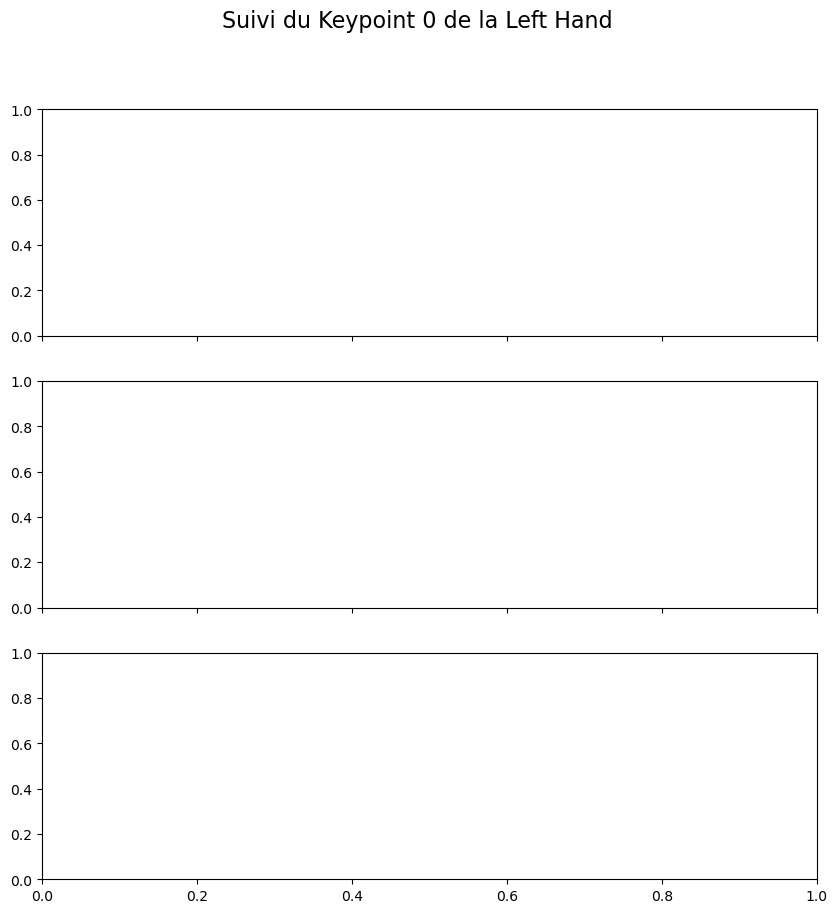

In [96]:
easy_plot(df)

C:\Users\Administrateur\AppData\Local\Temp\ipykernel_30848\2412147787.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(fontsize=6, loc="upper right")


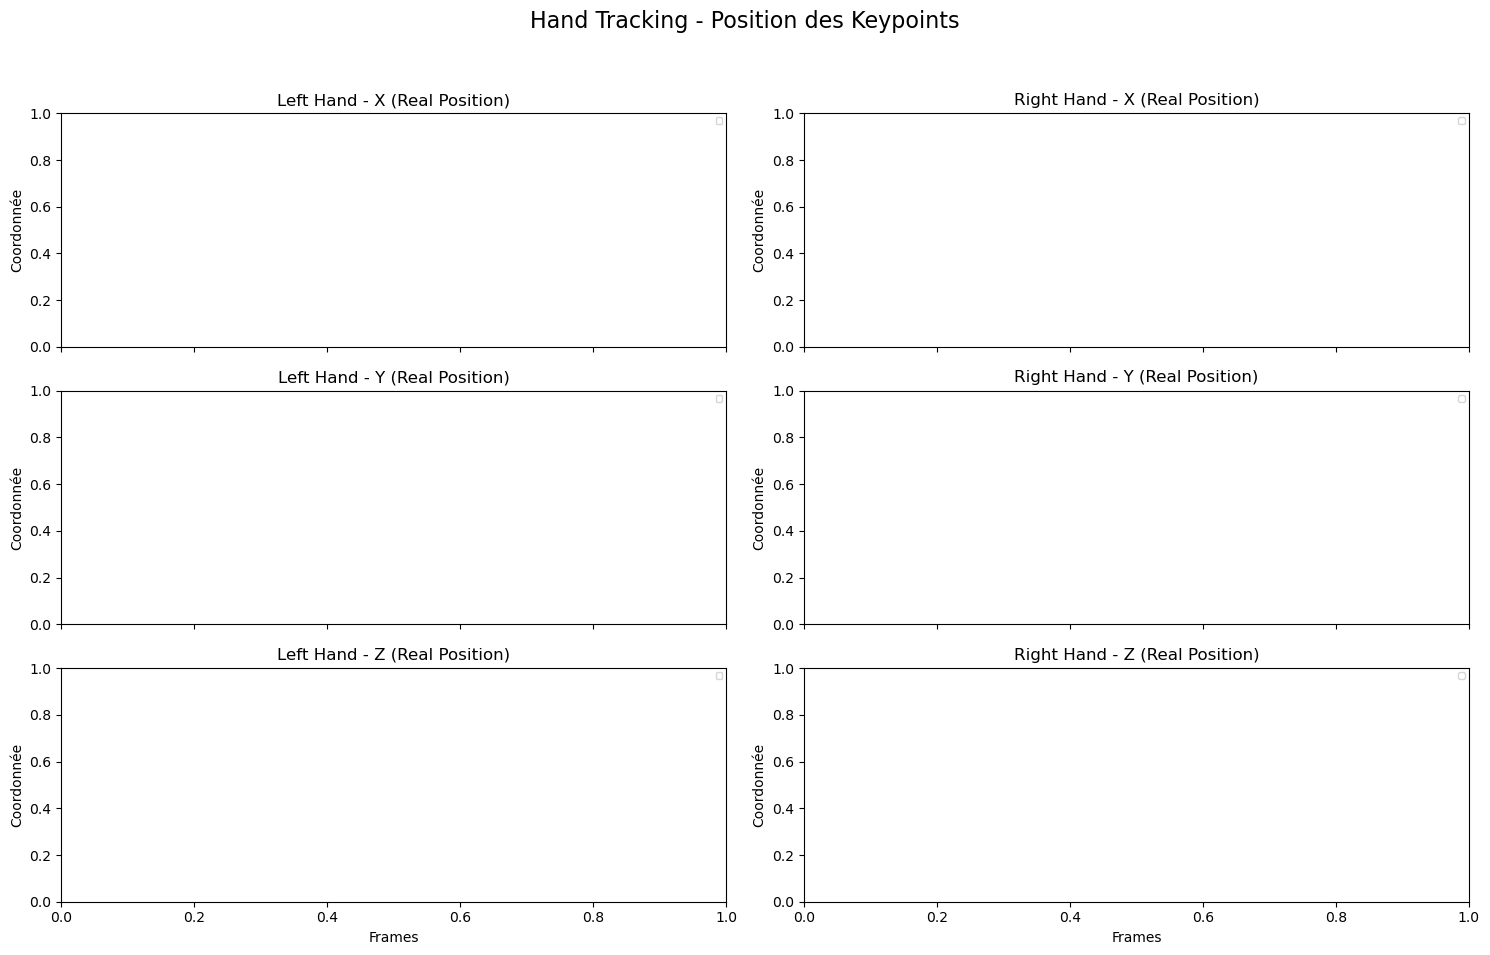

In [97]:
plot_hand_tracking(df)

In [8]:


def easy_plot_two_keypoints(df, keypoint_index1=0, keypoint_index2=9, hand="Left Hand"):
    frames = df["Relative Time (s)"]
    fig, axes = plt.subplots(4, 1, figsize=(10, 14), sharex=True)
    fig.suptitle(f"Suivi des Keypoints {keypoint_index1} et {keypoint_index2} de la {hand}", fontsize=16)

    colors = {"Left Hand": "blue", "Right Hand": "red"}
    coord_labels = {"x": "X", "y": "Y", "z": "Z"}
    kp1_data = {}
    kp2_data = {}
    distance_data = []

    for coord in ["x", "y", "z"]:
        kp1_col = (hand, "Relative Position", f"Keypoint {keypoint_index1}")
        kp2_col = (hand, "Relative Position", f"Keypoint {keypoint_index2}")

        if kp1_col in df.columns and kp2_col in df.columns:
            kp1_data[coord] = df[kp1_col].apply(
                lambda t: t[0] if isinstance(t, tuple) and coord == "x" else
                (t[1] if isinstance(t, tuple) and coord == "y" else
                 (t[2] if isinstance(t, tuple) else None))
            )
            axes[list("xyz").index(coord)].plot(frames, kp1_data[coord], label=f"KP{keypoint_index1} - {coord_labels[coord]}", color=colors[hand], alpha=0.7, linestyle='-')

            kp2_data[coord] = df[kp2_col].apply(
                lambda t: t[0] if isinstance(t, tuple) and coord == "x" else
                (t[1] if isinstance(t, tuple) and coord == "y" else
                 (t[2] if isinstance(t, tuple) else None))
            )
            axes[list("xyz").index(coord)].plot(frames, kp2_data[coord], label=f"KP{keypoint_index2} - {coord_labels[coord]}", color=colors[hand], alpha=0.7, linestyle='--')

            axes[list("xyz").index(coord)].set_ylabel(f"Coordonnée {coord_labels[coord]}")
            axes[list("xyz").index(coord)].legend(loc="upper right")
        else:
            print(f"Une ou plusieurs colonnes de keypoints non trouvées dans le DataFrame.")
            return

    # Calcul de la distance normalisée
    if kp1_data and kp2_data:
        for i in range(len(frames)):
            p1 = np.array([kp1_data['x'].iloc[i], kp1_data['y'].iloc[i], kp1_data['z'].iloc[i]])
            p2 = np.array([kp2_data['x'].iloc[i], kp2_data['y'].iloc[i], kp2_data['z'].iloc[i]])
            distance = np.linalg.norm(p1 - p2)
            distance_data.append(distance)

        axes[3].plot(frames, distance_data, label=f"Distance normalisée entre KP{keypoint_index1} et KP{keypoint_index2}", color='purple', alpha=0.7)
        axes[3].set_ylabel("Distance normalisée")
        axes[3].set_xlabel("Temps (s)")
        axes[3].legend(loc="upper right")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [13]:
easy_plot_two_keypoints(df, keypoint_index1=0, keypoint_index2=9, hand="Left Hand")

NameError: name 'df' is not defined

In [ ]:
easy_plot_two_keypoints(df, keypoint_index1=5, keypoint_index2=13, hand="Left Hand")

In [9]:
def mean_euclidean_distance(predictions, ground_truth):
    """
    Attention au format des predictions et du gt
    Calcul de l'erreur euclidienne moyenne entre les prédictions et la vérité terrain.
    :param predictions: numpy array (N, 21, 3) - Prédictions des 21 keypoints 3D
    :param ground_truth: numpy array (N, 21, 3) - Positions réelles des 21 keypoints 3D
    :return: Mean Euclidean Distance (float)
    """
    return np.mean(np.linalg.norm(predictions - ground_truth, axis=-1))

In [10]:
#import fiftyone as fo
#import fiftyone.zoo as foz
#for media pipe dataset

In [11]:
def easy_plot_three_keypoints(df, keypoint_index1=0, keypoint_index2=9, keypoint_index3=12, hand="Left Hand"):

    frames = df["Relative Time (s)"]
    fig, axes = plt.subplots(6, 1, figsize=(10, 18), sharex=True)
    fig.suptitle(f"Suivi des Keypoints {keypoint_index1}, {keypoint_index2} et {keypoint_index3} de la {hand}", fontsize=16)

    colors = {"Left Hand": "blue", "Right Hand": "red"}
    coord_labels = {"x": "X", "y": "Y", "z": "Z"}
    kp1_data = {}
    kp2_data = {}
    kp3_data = {}
    dist12_data = []
    dist13_data = []
    dist23_data = []

    kp_indices = {keypoint_index1: "KP0", keypoint_index2: "KP9", keypoint_index3: "KP12"}
    kp_data = {keypoint_index1: kp1_data, keypoint_index2: kp2_data, keypoint_index3: kp3_data}

    for coord in ["x", "y", "z"]:
        for kp_index, data_dict in kp_data.items():
            kp_col = (hand, "Relative Position", f"Keypoint {kp_index}")
            if kp_col in df.columns:
                data_dict[coord] = df[kp_col].apply(
                    lambda t: t[0] if isinstance(t, tuple) and coord == "x" else
                    (t[1] if isinstance(t, tuple) and coord == "y" else
                     (t[2] if isinstance(t, tuple) else None))
                )
                axes[list("xyz").index(coord)].plot(frames, data_dict[coord],
                                                   label=f"{kp_indices[kp_index]} - {coord_labels[coord]}",
                                                   color=colors[hand], alpha=0.7,
                                                   linestyle=['-', '--', ':'][list(kp_indices.keys()).index(kp_index)])
                axes[list("xyz").index(coord)].set_ylabel(f"Coordonnée {coord_labels[coord]}")
                axes[list("xyz").index(coord)].legend(loc="upper right")
            else:
                print(f"Colonne {kp_col} non trouvée dans le DataFrame.")
                return

    # Calcul des distances normalisées
    if kp1_data and kp2_data and kp3_data:
        for i in range(len(frames)):
            p1 = np.array([kp1_data['x'].iloc[i], kp1_data['y'].iloc[i], kp1_data['z'].iloc[i]])
            p2 = np.array([kp2_data['x'].iloc[i], kp2_data['y'].iloc[i], kp2_data['z'].iloc[i]])
            p3 = np.array([kp3_data['x'].iloc[i], kp3_data['y'].iloc[i], kp3_data['z'].iloc[i]])

            dist12 = np.linalg.norm(p1 - p2)
            dist13 = np.linalg.norm(p1 - p3)
            dist23 = np.linalg.norm(p2 - p3)

            dist12_data.append(dist12)
            dist13_data.append(dist13)
            dist23_data.append(dist23)

        axes[3].plot(frames, dist12_data, label=f"Distance normalisée entre KP{keypoint_index1} et KP{keypoint_index2}", color='purple', alpha=0.7)
        axes[3].set_ylabel("Distance (KP0-KP9)")
        axes[3].legend(loc="upper right")

        axes[4].plot(frames, dist13_data, label=f"Distance normalisée entre KP{keypoint_index1} et KP{keypoint_index3}", color='orange', alpha=0.7)
        axes[4].set_ylabel("Distance (KP0-KP12)")
        axes[4].legend(loc="upper right")

        axes[5].plot(frames, dist23_data, label=f"Distance normalisée entre KP{keypoint_index2} et KP{keypoint_index3}", color='lime', alpha=0.7)
        axes[5].set_ylabel("Distance (KP9-KP12)")
        axes[5].set_xlabel("Temps (s)")
        axes[5].legend(loc="upper right")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

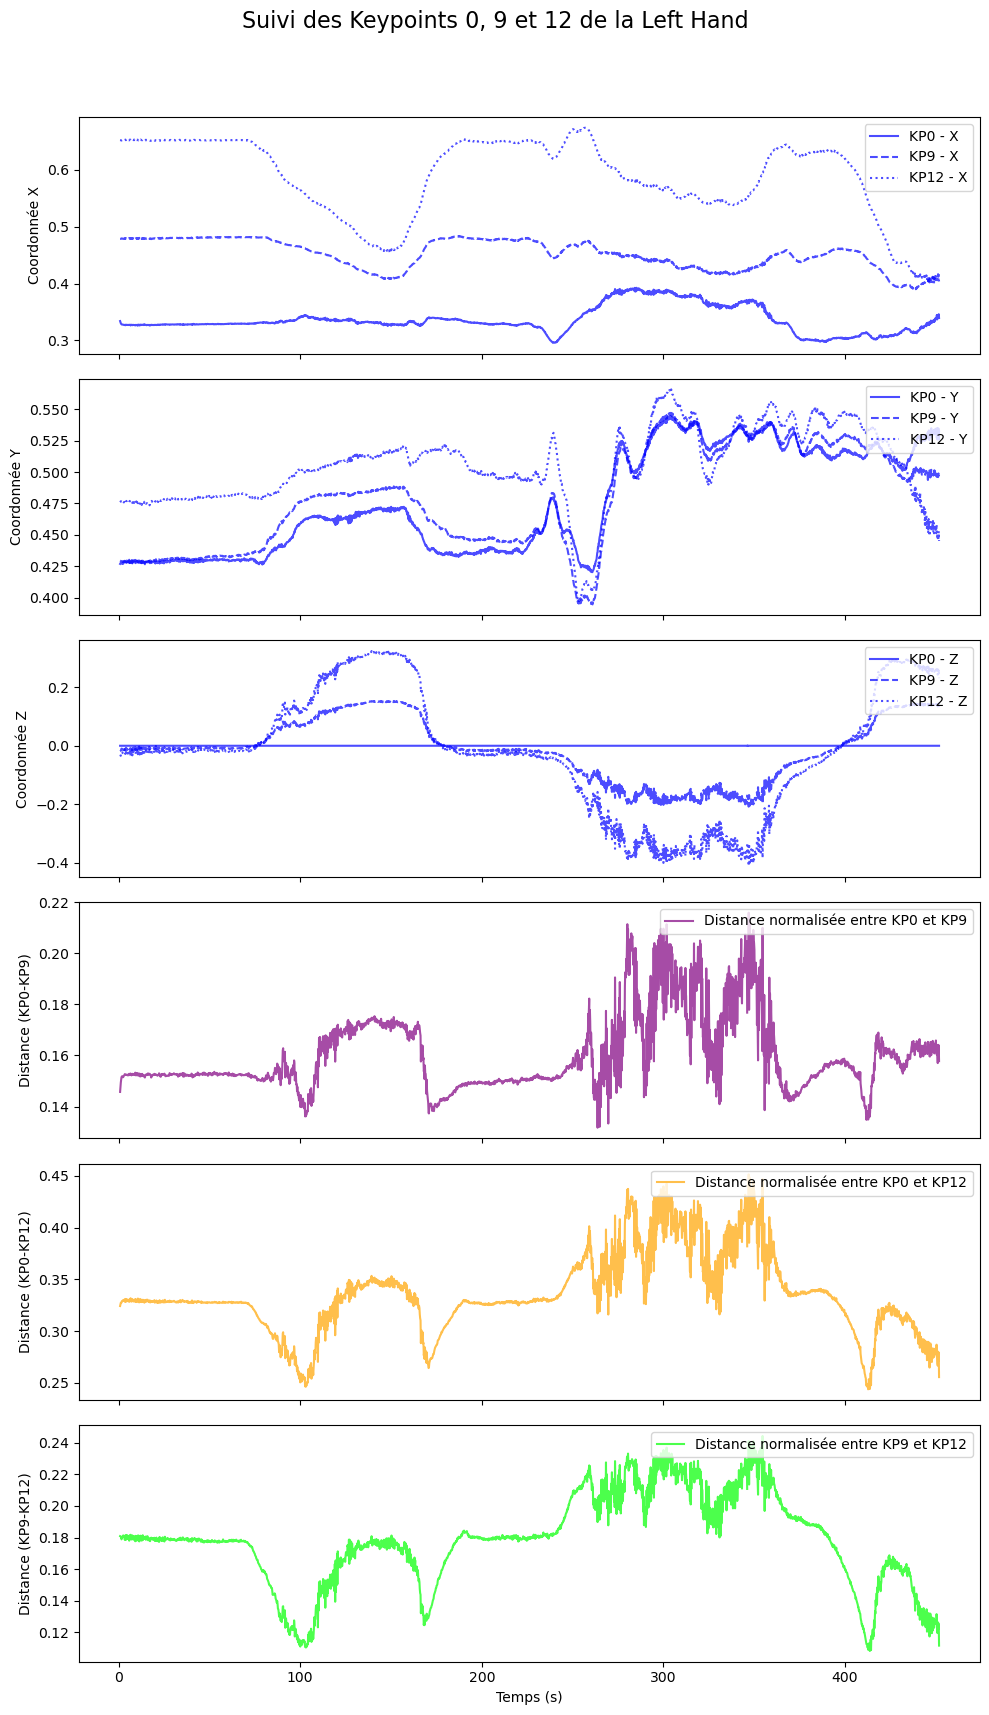

In [29]:
easy_plot_three_keypoints(df, keypoint_index1=0, keypoint_index2=9, keypoint_index3=12, hand="Left Hand")

In [52]:
import cv2
import numpy as np

def nothing(x):
    pass

cv2.namedWindow("HSV Adjuster")
cv2.createTrackbar("Lower H", "HSV Adjuster", 40, 179, nothing)
cv2.createTrackbar("Lower S", "HSV Adjuster", 50, 255, nothing)
cv2.createTrackbar("Lower V", "HSV Adjuster", 50, 255, nothing)
cv2.createTrackbar("Upper H", "HSV Adjuster", 90, 179, nothing)
cv2.createTrackbar("Upper S", "HSV Adjuster", 255, 255, nothing)
cv2.createTrackbar("Upper V", "HSV Adjuster", 255, 255, nothing)

cap = cv2.VideoCapture(1)  # Ou le chemin de votre vidéo

while True:
    ret, frame = cap.read()
    if not ret:
        break

    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    l_h = cv2.getTrackbarPos("Lower H", "HSV Adjuster")
    l_s = cv2.getTrackbarPos("Lower S", "HSV Adjuster")
    l_v = cv2.getTrackbarPos("Lower V", "HSV Adjuster")
    u_h = cv2.getTrackbarPos("Upper H", "HSV Adjuster")
    u_s = cv2.getTrackbarPos("Upper S", "HSV Adjuster")
    u_v = cv2.getTrackbarPos("Upper V", "HSV Adjuster")

    lower_green = np.array([l_h, l_s, l_v])
    upper_green = np.array([u_h, u_s, u_v])

    mask = cv2.inRange(hsv, lower_green, upper_green)

    cv2.imshow("Frame", frame)
    cv2.imshow("Mask", mask)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [101]:
df = dftest = pd.read_csv("./result/video/spatial precision/xy/2markers/tracking_results.csv")
df = dftest = pd.read_csv("./precision_rapport.csv")

In [15]:
display(df)

NameError: name 'df' is not defined

In [12]:

    
def true_detect_blue_point(frame, mediapipe_points):
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    lower_blue = np.array([100, 100, 50])
    upper_blue = np.array([140, 255, 155])
    mask = cv2.inRange(hsv, lower_blue, upper_blue)
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    blue_points = []
    matched_points = []


    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        if 5 < w < 30 and 5 < h < 30:
            cx, cy = x + w // 2, y + h // 2
            blue_points.append((cx, cy))
            cv2.circle(frame, (cx, cy), 5, (0, 0, 255), -1)


  #  if mediapipe_points and blue_points:
  #      for mp_idx, mp_point in enumerate(mediapipe_points):
  #          min_distance = float('inf')
            closest_cv_point = None

  #         for cv_point in blue_points:
  #              distance = np.linalg.norm(np.array(int(mp_point)) - np.array(cv_point))
  #              if distance < min_distance:
  #                  min_distance = distance
  #                  closest_cv_point = cv_point

 #           if closest_cv_point and min_distance <= max_distance:
  #              matched_points.append(closest_cv_point)
#                if min_distance < 10:
#                    cv2.circle(frame, mp_point, 5, (0, 255, 255), -1)
    return blue_points#, matched_points






In [ ]:
display(df)

In [ ]:
plot_keypoints_vs_blue(df,5,13)

In [86]:
import matplotlib.pyplot as plt
import numpy as np

def plot_keypoints_vs_blue(df, keypoint_id_1, keypoint_id_2=None, blue_point=True):

    df_match = df[(df['Type'] == 'MP-CV') & (df['Point_ID'].isin([keypoint_id_1, keypoint_id_2]))]
    
    l2_distances = df_match['L2_Error'].values
    if len(l2_distances) > 0:
        mean_dist = np.mean(l2_distances)
        median_dist = np.median(l2_distances)
    else:
        mean_dist = median_dist = float('nan')

    plt.figure(figsize=(14, 6))

    # ---- Position X ----
    plt.subplot(1, 3, 1)
    if blue_point:
        plt.scatter(df[df['Type'] == 'CV']['Frame'], df[df['Type'] == 'CV']['x'], c='blue', s=10, label='Blue Points (CV)')

    for kpt_id, color in zip([keypoint_id_1, keypoint_id_2], ['red', 'green']):
        kpt_df = df[(df['Type'].isin(['MP', 'MP-CV','REL'])) & (df['Point_ID'] == kpt_id)]
        plt.plot(kpt_df['Frame'], kpt_df['x'], color=color, label=f'Keypoint {kpt_id} - x')

    plt.title(f'Position X vs Frame\nMean L2 = {mean_dist:.2f} px | Median L2 = {median_dist:.2f} px')
    plt.xlabel('Frame')
    plt.ylabel('Position X (pixels)')
    plt.legend()

    # ---- Position Y ----
    plt.subplot(1, 3, 2)
    if blue_point:
        plt.scatter(df[df['Type'] == 'CV']['Frame'], df[df['Type'] == 'CV']['y'], c='blue', s=10, label='Blue Points (CV)')

    for kpt_id, color in zip([keypoint_id_1, keypoint_id_2], ['red', 'green']):
        kpt_df = df[(df['Type'].isin(['MP', 'MP-CV', 'REL'])) & (df['Point_ID'] == kpt_id)]
        plt.plot(kpt_df['Frame'], kpt_df['y'], color=color, label=f'Keypoint {kpt_id} - y')
    
    plt.title('Position Y vs Frame')
    plt.xlabel('Frame')
    plt.ylabel('Position Y (pixels)')
    plt.legend()


    # ---- Position Z ----
    plt.subplot(1, 3, 3)
    if blue_point:
        plt.scatter(df[df['Type'] == 'CV']['Frame'], df[df['Type'] == 'CV']['z'], c='blue', s=10, label='Blue Points (CV)')

    for kpt_id, color in zip([keypoint_id_1, keypoint_id_2], ['red', 'green']):
        print(color)
        print(kpt_id)
        kpt_df = df[(df['Type'].isin(['MP', 'MP-CV', 'REL'])) & (df['Point_ID'] == kpt_id)]

        plt.plot(kpt_df['Frame'], kpt_df['z'], color=color, label=f'Keypoint {kpt_id} - z')
    
    plt.title('Position Z vs Frame')
    plt.xlabel('Frame')
    plt.ylabel('Position Z (relative normalized)')
    plt.legend()

    
    plt.tight_layout()
    plt.show()


red
5
green
6


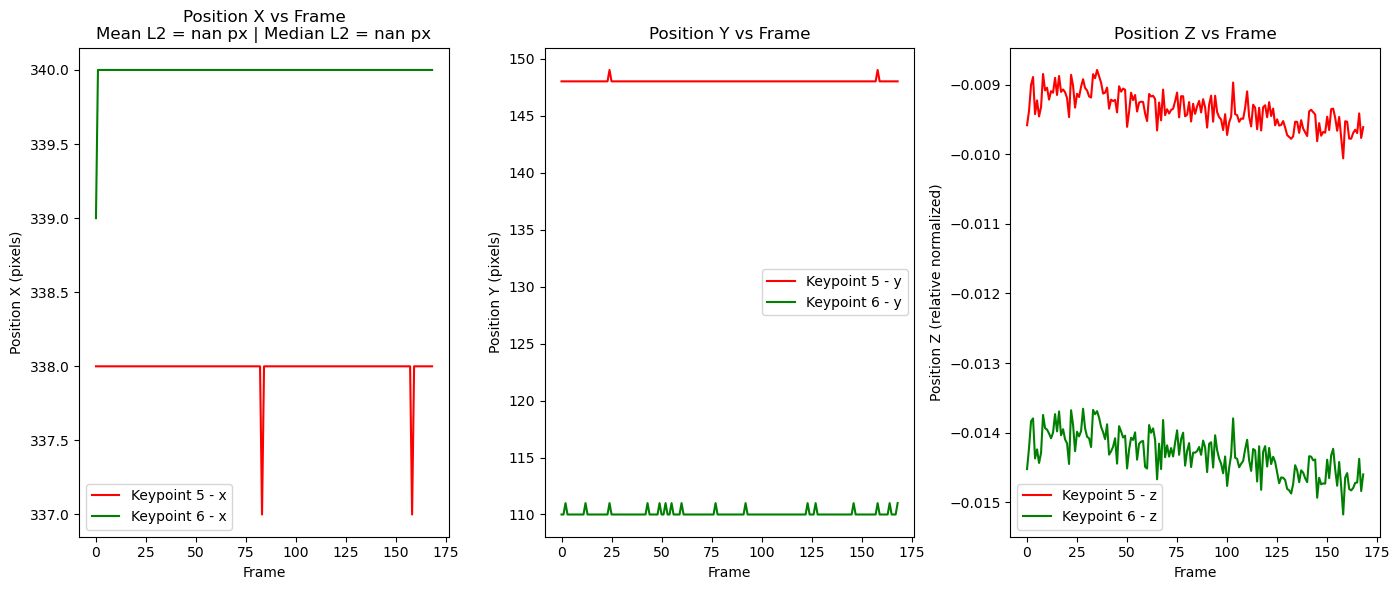

red
9
green
12


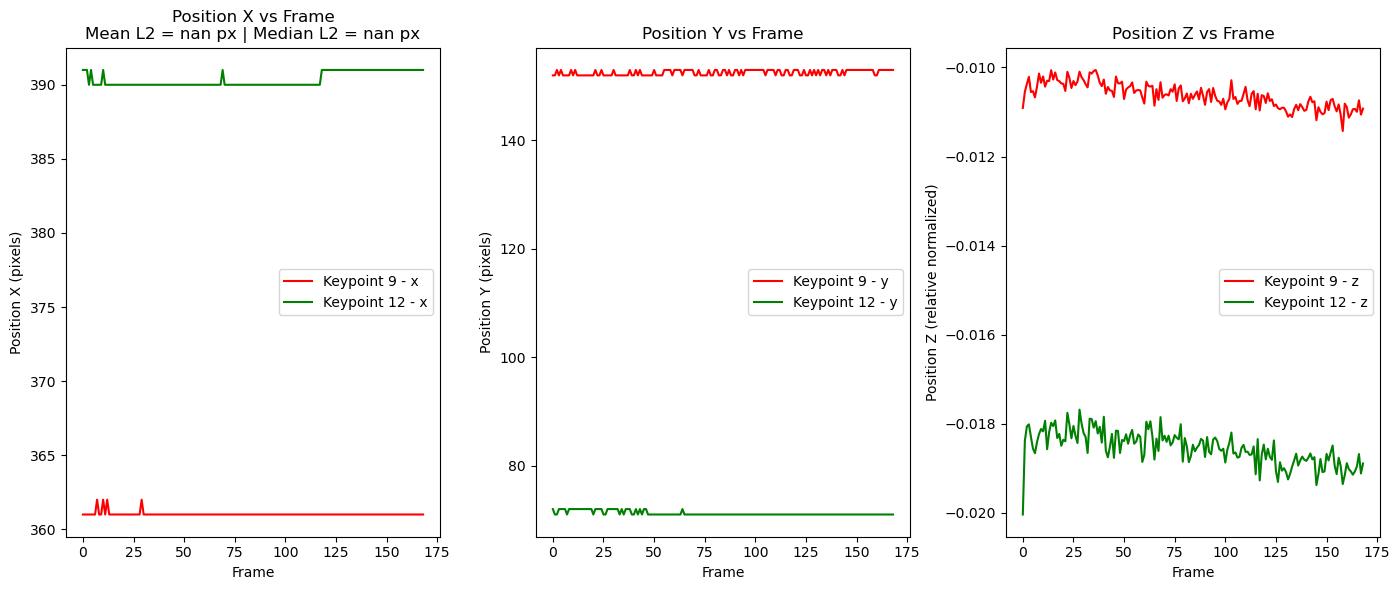

In [91]:
# og bruité
plot_keypoints_vs_blue(df,5, 6,blue_point=False)
plot_keypoints_vs_blue(df,9, 12,blue_point=False)


In [ ]:
display(df)

In [41]:
print("x max",df['x'].max())
print("y max",df['y'].max())

print("x min",df['x'].min())
print("y min",df['y'].min())


print("L2 max",df['L2_Error'].max())
print("L2 min",df['L2_Error'].min())

print("L2 mean", df['L2_Error'].mean())

print("instance of L2", df['L2_Error'].count(), "out of", len(df))


x max 789
y max 377
x min 3
y min -20
L2 max 50.0
L2 min 1.0
L2 mean 29.488886429899953
instance of L2 3277 out of 26055


In [ ]:
display(df)

In [151]:
print(df[df['Frame'] == 566])

       Frame  Relative Time (s)                    Montreal Time   Type  \
12129    566            28.9161 2025-04-22 10:02:58.160998-04:00     CV   
12130    566            28.9161 2025-04-22 10:02:58.160998-04:00     CV   
12131    566            28.9161 2025-04-22 10:02:58.160998-04:00     CV   
12132    566            28.9161 2025-04-22 10:02:58.160998-04:00  MP-CV   
12133    566            28.9161 2025-04-22 10:02:58.160998-04:00  MP-CV   
12134    566            28.9161 2025-04-22 10:02:58.160998-04:00  MP-CV   
12135    566            28.9161 2025-04-22 10:02:58.160998-04:00  MP-CV   
12136    566            28.9161 2025-04-22 10:02:58.160998-04:00  MP-CV   
12137    566            28.9161 2025-04-22 10:02:58.160998-04:00     MP   
12138    566            28.9161 2025-04-22 10:02:58.160998-04:00     MP   
12139    566            28.9161 2025-04-22 10:02:58.160998-04:00     MP   
12140    566            28.9161 2025-04-22 10:02:58.160998-04:00     MP   
12141    566            2

In [ ]:
print(df[df['Point_ID'] == 5]['y'])

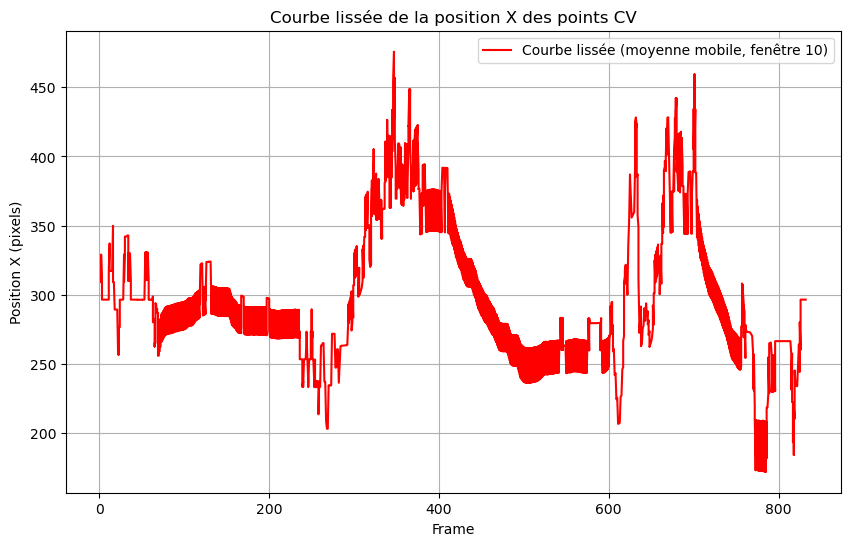

In [463]:
# og non bruité
cv_points = df[df['Type'] == 'CV'].copy()
fenetre_moyenne = 10 # Essaie différentes valeurs pour voir l'effet
cv_points['x_lisse'] = cv_points['x'].rolling(window=fenetre_moyenne, center=True).mean()
plt.figure(figsize=(10, 6))
plt.plot(cv_points['Frame'], cv_points['x_lisse'], color='red', label=f'Courbe lissée (moyenne mobile, fenêtre {fenetre_moyenne})')
plt.xlabel('Frame')
plt.ylabel('Position X (pixels)')
plt.title('Courbe lissée de la position X des points CV')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
display(df)

In [39]:
len(df)

18386

In [356]:
print(df[(df['Point_ID'] == 17) & (df['Type'] == 'MP-CV')])

Empty DataFrame
Columns: [Frame, Relative Time (s), Montreal Time, Type, Point_ID, x, y, L2_Error]
Index: []


In [42]:
print(df['Frame'].max())

834


In [459]:
mp_cv_df = df[df['Type'] == 'MP-CV'].copy()
len(mp_cv_df)

1681

In [ ]:
display(mp_cv_df)

In [434]:
mp_cv_df = mp_cv_df[(mp_cv_df['Point_ID'] == 5) | (mp_cv_df['Point_ID'] == 17)].copy()
len(mp_cv_df)

921

In [460]:
mp_cv_df = mp_cv_df[(mp_cv_df['Point_ID'] == 5)].copy()
len(mp_cv_df)

726

In [ ]:
display(mp_cv_df)

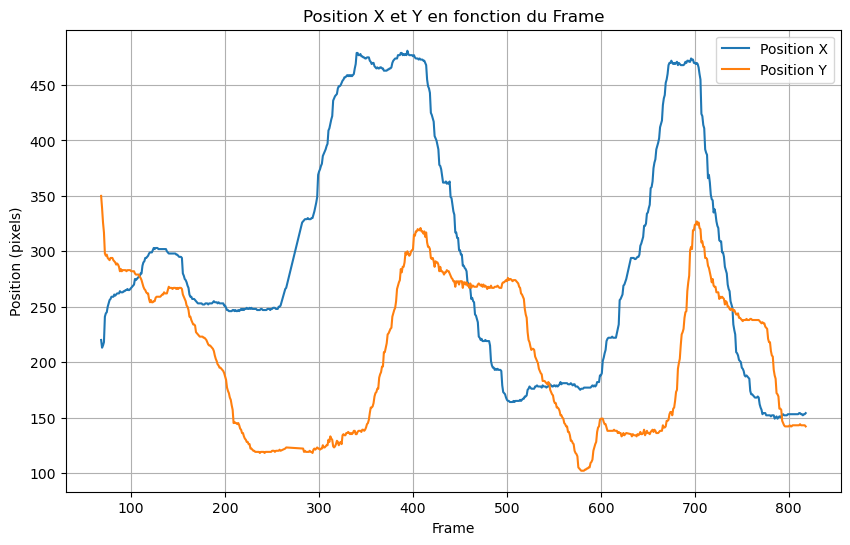

In [464]:
# mp bruité
plt.figure(figsize=(10, 6))
plt.plot(mp_cv_df['Frame'], mp_cv_df['x'], label='Position X') 
plt.plot(mp_cv_df['Frame'], mp_cv_df['y'], label='Position Y') 
plt.xlabel('Frame')
plt.ylabel('Position (pixels)')
plt.title('Position X et Y en fonction du Frame')
plt.legend()
plt.grid(True)
plt.show()

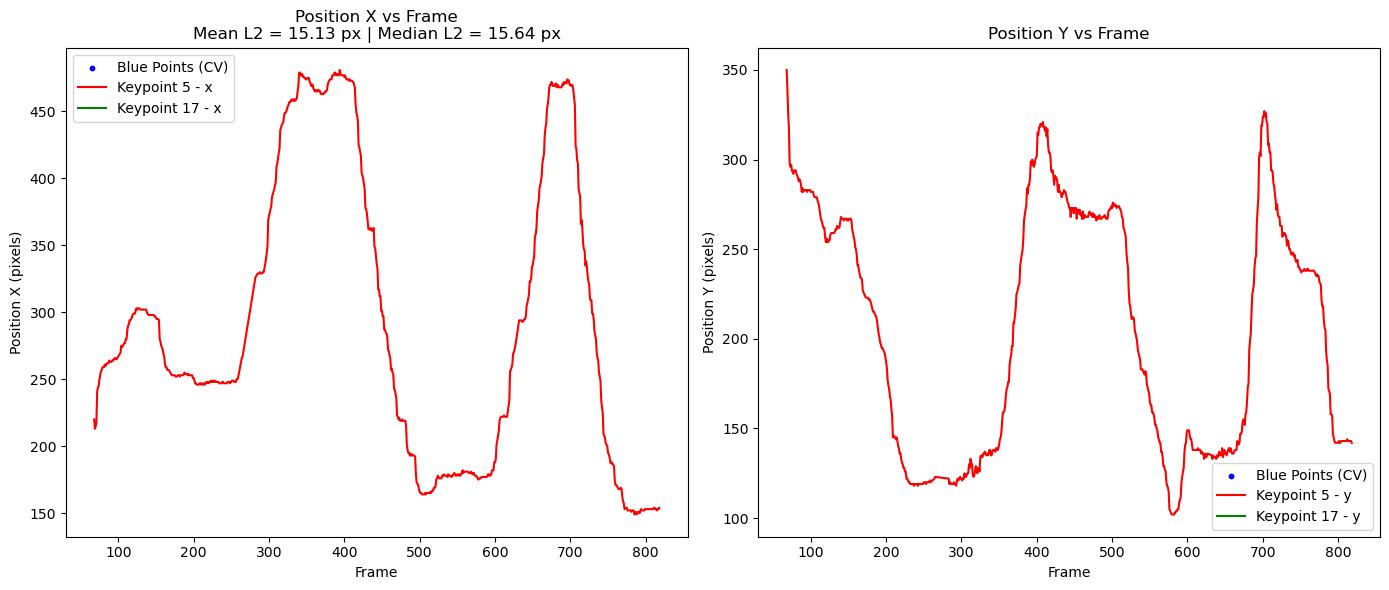

In [465]:
plot_keypoints_vs_blue(mp_cv_df,5,17)

In [376]:
print("x max",mp_cv_df['x'].max())
print("y max",mp_cv_df['y'].max())

print("x min",mp_cv_df['x'].min())
print("y min",mp_cv_df['y'].min())
print(mp_cv_df[mp_cv_df['y'] == -35])

print("L2 max",mp_cv_df['L2_Error'].max())
print("L2 min",mp_cv_df['L2_Error'].min())

print("L2 mean", mp_cv_df['L2_Error'].mean())

print("instance of L2", mp_cv_df['L2_Error'].count(), "out of", len(df))


x max 571
y max 285
x min 165
y min 34
Empty DataFrame
Columns: [Frame, Relative Time (s), Montreal Time, Type, Point_ID, x, y, L2_Error]
Index: []
L2 max 27.29468812791236
L2 min 1.0
L2 mean 9.248669440852726
instance of L2 921 out of 26055


In [14]:
def compute_stats(df):

  colonnes_cible = ['x', 'y', 'L2_Error']
  df_cible = df[colonnes_cible]

  # Vérifier si les colonnes existent et sont numériques
  for col in df_cible.columns:
    if not pd.api.types.is_numeric_dtype(df_cible[col]):
      print(f"Erreur: La colonne '{col}' n'est pas numérique.")
      return None

  if df_cible.empty:
    print("Erreur: Aucune des colonnes 'x', 'y' ou 'L2_Error' n'a été trouvée.")
    return None

  statistiques = pd.DataFrame({
      'Maximum (pixel)': df_cible.max(),
      'Minimum (pixel)': df_cible.min(),
      'Médiane (pixel)': df_cible.median(),
      'Moyenne (pixel)': df_cible.mean(),
      'Écart-type (pixel)': df_cible.std()
  })
  return statistiques

In [467]:
stats_df = compute_stats(mp_cv_df)

In [15]:
def compute_stats_z(df, keypoint_id):
    z_values = df[(df['Type'].isin(['MP', 'MP-CV'])) & (df['Point_ID'] == keypoint_id)]['z'].dropna()

    if z_values.empty:
        return {
            'moyenne_z': np.nan,
            'mediane_z': np.nan,
            'max_z': np.nan,
            'min_z': np.nan,
            'ecart_type_z': np.nan,
            'max_info': None,
            'min_info': None
        }

    moyenne_z = np.mean(z_values)
    mediane_z = np.median(z_values)
    max_z = np.max(z_values)
    min_z = np.min(z_values)
    ecart_type_z = np.std(z_values)

    max_row = df[(df['Type'].isin(['MP', 'MP-CV'])) & (df['Point_ID'] == keypoint_id) & (df['z'] == max_z)].iloc[0].to_dict()
    min_row = df[(df['Type'].isin(['MP', 'MP-CV'])) & (df['Point_ID'] == keypoint_id) & (df['z'] == min_z)].iloc[0].to_dict()

    return {
        'moyenne_z': moyenne_z,
        'mediane_z': mediane_z,
        'max_z': max_z,
        'min_z': min_z,
        'ecart_type_z': ecart_type_z,
        'max_info': max_row,
        'min_info': min_row
    }

In [84]:
def compute_stats_z_rel_df(df, keypoint_id, type_='REL'):
    z_values = df[(df['Type'] == type_) & (df['Point_ID'] == keypoint_id)]['z'].dropna()

    if z_values.empty:
        return pd.DataFrame([{
            'Type': 'REL',
            'Keypoint_ID': keypoint_id,
            'moyenne_z': np.nan,
            'mediane_z': np.nan,
            'max_z': np.nan,
            'min_z': np.nan,
            'ecart_type_z': np.nan,
            'Frame_max': np.nan,
            'Frame_min': np.nan
        }])

    max_row = df[(df['Type'] == type_) & (df['Point_ID'] == keypoint_id) & (df['z'] == z_values.max())].iloc[0]
    min_row = df[(df['Type'] == type_) & (df['Point_ID'] == keypoint_id) & (df['z'] == z_values.min())].iloc[0]

    stats = {
        'Type': type_,
        'Keypoint_ID': keypoint_id,
        'moyenne_z': np.mean(z_values),
        'mediane_z': np.median(z_values),
        'max_z': z_values.max(),
        'min_z': z_values.min(),
        'ecart_type_z': np.std(z_values),
        'Frame_max': max_row['Frame'],
        'Frame_min': min_row['Frame']
    }

    return pd.DataFrame([stats])


In [85]:
for kp in [5,6,9]:
    statistiques_zn_rel = compute_stats_z_rel_df(dfn, kp, type_='REL')
    statistiques_zn_ort = compute_stats_z_rel_df(dfn, kp, type_='ORT')
    display(statistiques_zn_rel)
    display(statistiques_zn_ort)
    print("------------------------------------------------------------------------")


,Type,Keypoint_ID,moyenne_z,mediane_z,max_z,min_z,ecart_type_z,Frame_max,Frame_min
0,REL,5,-0.010315,-0.01033,-0.009679,-0.010962,0.000214,189,131


,Type,Keypoint_ID,moyenne_z,mediane_z,max_z,min_z,ecart_type_z,Frame_max,Frame_min
0,ORT,5,1.276636e-19,0.0,3.469447e-18,-3.469447e-18,1.139930e-18,24,7


------------------------------------------------------------------------


,Type,Keypoint_ID,moyenne_z,mediane_z,max_z,min_z,ecart_type_z,Frame_max,Frame_min
0,REL,6,-0.015457,-0.01546,-0.014559,-0.016279,0.000274,189,131


,Type,Keypoint_ID,moyenne_z,mediane_z,max_z,min_z,ecart_type_z,Frame_max,Frame_min
0,ORT,6,0.000366,0.000368,0.000668,0.000116,0.000091,0,214


------------------------------------------------------------------------


,Type,Keypoint_ID,moyenne_z,mediane_z,max_z,min_z,ecart_type_z,Frame_max,Frame_min
0,REL,9,-0.011807,-0.011803,-0.011263,-0.01246,0.000194,189,131


,Type,Keypoint_ID,moyenne_z,mediane_z,max_z,min_z,ecart_type_z,Frame_max,Frame_min
0,ORT,9,0.001543,0.001544,0.001614,0.001486,0.000024,214,127


------------------------------------------------------------------------


In [90]:
keypoint_a_analyser = 9
for keypoint_a_analyser in [5,6,9,10]:
    statistiques_z = compute_stats_z(df, keypoint_a_analyser)

    print(f"Statistiques de la coordonnée z pour le keypoint {keypoint_a_analyser}:")
    print(f"  Moyenne: {statistiques_z['moyenne_z']:.6f}")
    print(f"  Médiane: {statistiques_z['mediane_z']:.6f}")
    print(f"  Écart-type: {statistiques_z['ecart_type_z']:.6f}")
    print(f"  Maximum: {statistiques_z['max_z']:.6f}")
    print(f"  Minimum: {statistiques_z['min_z']:.6f}")
    print(f"    Informations de la DF au maximum: {statistiques_z['max_info']}")
    print(f"    Informations de la DF au minimum: {statistiques_z['min_info']}\n\n")


Statistiques de la coordonnée z pour le keypoint 5:
  Moyenne: -0.009355
  Médiane: -0.009363
  Écart-type: 0.000247
  Maximum: -0.008788
  Minimum: -0.010058
    Informations de la DF au maximum: {'Frame': 35, 'Relative Time (s)': 2.7157504558563232, 'Montreal Time': Timestamp('2025-05-09 16:49:12.977754-0400', tz='America/Montreal'), 'Type': 'MP', 'Point_ID': 5, 'x': 338, 'y': 148, 'z': -0.00878831185400486, 'L2_Error': None}
    Informations de la DF au minimum: {'Frame': 158, 'Relative Time (s)': 11.792128324508667, 'Montreal Time': Timestamp('2025-05-09 16:49:22.054132-0400', tz='America/Montreal'), 'Type': 'MP', 'Point_ID': 5, 'x': 337, 'y': 149, 'z': -0.010058406740427017, 'L2_Error': None}


Statistiques de la coordonnée z pour le keypoint 6:
  Moyenne: -0.014302
  Médiane: -0.014290
  Écart-type: 0.000308
  Maximum: -0.013656
  Minimum: -0.015175
    Informations de la DF au maximum: {'Frame': 28, 'Relative Time (s)': 2.2547359466552734, 'Montreal Time': Timestamp('2025-05-09 

In [468]:
display(stats_df)

,Maximum (pixel),Minimum (pixel),Médiane (pixel),Moyenne (pixel),Écart-type (pixel)
x,481.0000,149.0000,263.0000,293.3857,107.4388
y,350.0000,102.0000,215.5000,207.1584,66.8853
L2_Error,30.2324,0.0000,15.6365,15.1322,4.7343


In [469]:
mp_cv_df[mp_cv_df['L2_Error'] == 50]

,Frame,Relative Time (s),Montreal Time,Type,Point_ID,x,y,L2_Error


In [17]:
def pixels_vers_mm(distance_en_pixels, ref_en_pixel, ref_en_mm): 

  mm_par_pixel = ref_en_mm / ref_en_pixel

  distance_en_mm = distance_en_pixels * mm_par_pixel
  return distance_en_mm

In [18]:
distance_pixels = 87
distance_mm = pixels_vers_mm(distance_pixels, 200, 100)
print(f"{distance_pixels} pixels correspondent à environ {distance_mm:.2f} mm (avec la camera à 10cm de la main).")

87 pixels correspondent à environ 43.50 mm (avec la camera à 10cm de la main).


In [19]:
def compute_stats_mm(df, ref_en_pixel, ref_en_mm):

  colonnes_cible = ['x', 'y', 'L2_Error']
  df_cible = df[colonnes_cible]

  # Vérifier si les colonnes existent et sont numériques
  for col in df_cible.columns:
    if not pd.api.types.is_numeric_dtype(df_cible[col]):
      print(f"Erreur: La colonne '{col}' n'est pas numérique.")
      return None

  if df_cible.empty:
    print("Erreur: Aucune des colonnes 'x', 'y' ou 'L2_Error' n'a été trouvée.")
    return None

  statistiques = pd.DataFrame({
      'Maximum (mm)': pixels_vers_mm(df_cible.max(), ref_en_pixel, ref_en_mm),
      'Minimum (mm)': pixels_vers_mm(df_cible.min(), ref_en_pixel, ref_en_mm),
      'Médiane (mm)': pixels_vers_mm(df_cible.median(), ref_en_pixel, ref_en_mm),
      'Moyenne (mm)':pixels_vers_mm( df_cible.mean(), ref_en_pixel, ref_en_mm),
      'Écart-type (mm)': pixels_vers_mm(df_cible.std(), ref_en_pixel, ref_en_mm)
  })
  return statistiques
    

In [475]:
stats_df_mm = compute_stats_mm(mp_cv_df,200,100)
display(stats_df_mm)

,Maximum (mm),Minimum (mm),Médiane (mm),Moyenne (mm),Écart-type (mm)
x,240.5000,74.5000,131.5000,146.6928,53.7194
y,175.0000,51.0000,107.7500,103.5792,33.4427
L2_Error,15.1162,0.0000,7.8182,7.5661,2.3672


In [476]:
print(mp_cv_df[mp_cv_df['Point_ID'] == 5]['L2_Error'].max())

30.23243291566195


In [478]:
print(mp_cv_df[(mp_cv_df['L2_Error'] > 30)])

     Frame  Relative Time (s)                     Montreal Time   Type  \
233     68             2.6090  2025-04-22 10:02:31.853827-04:00  MP-CV   

     Point_ID    x    y  L2_Error  
233         5  220  350   30.2324  


In [447]:
print(mp_cv_df[(mp_cv_df['L2_Error'] == mp_cv_df['L2_Error'].max())])

       Frame  Relative Time (s)                     Montreal Time   Type  \
19584    960            76.3372  2025-04-23 11:46:36.436379-04:00  MP-CV   

       Point_ID    x    y  L2_Error  
19584        17  286  221   27.2947  


In [448]:
print(mp_cv_df['L2_Error'].max())
print(mp_cv_df.iloc[594])

27.29468812791236
Frame                                             960
Relative Time (s)                             76.3372
Montreal Time        2025-04-23 11:46:36.436379-04:00
Type                                            MP-CV
Point_ID                                           17
x                                                 286
y                                                 221
L2_Error                                      27.2947
Name: 19584, dtype: object


to do:

1 seul markeur
1 seul dimension -> diff entre x1 x2 puis y1 y2

1frame = 1 ide,tification des deux -> crope la videos

max min median

puis x y




In [20]:
def compute_l2(df, keypoint_id1, keypoint_id2):

  point1 = df[df['Point_ID'] == keypoint_id1].copy()
  point2 = df[df['Point_ID'] == keypoint_id2].copy()

  if point1.empty or point2.empty:
    print(f"Erreur: Les Point_ID {keypoint_id1} ou {keypoint_id2} ne sont pas présents dans le DataFrame.")
    return None, None, None, None, None

  # Fusionner les données des deux points clés par 'Frame'
  merged_df = pd.merge(point1[['Frame', 'x', 'y']],
                       point2[['Frame', 'x', 'y']],
                       on='Frame',
                       suffixes=('_kp1', '_kp2'))

  # Calculer la distance L2
  merged_df['Distance_L2'] = np.sqrt((merged_df['x_kp1'] - merged_df['x_kp2'])**2 +
                                     (merged_df['y_kp1'] - merged_df['y_kp2'])**2)

  distances_l2 = merged_df[['Frame', 'Distance_L2']].copy()

  mean_l2 = distances_l2['Distance_L2'].mean()
  mediane_l2 = distances_l2['Distance_L2'].median()
  max_l2 = distances_l2['Distance_L2'].max()
  min_l2 = distances_l2['Distance_L2'].min()
  ecart_type_l2 = distances_l2['Distance_L2'].std()

  return distances_l2, mean_l2, mediane_l2, max_l2, min_l2, ecart_type_l2

In [450]:
keypoint1 = 5
keypoint2 = 6
distance_df, mean, mediane, maximum, minimum, ecart_type = compute_l2(df, keypoint1, keypoint2)

ref_en_pixel = 130
ref_en_mm = 100

if distance_df is not None:
  print(f"DataFrame des distances L2 entre le point clé {keypoint1} et {keypoint2}:")
  print(distance_df.head())
    
  print(f"\nMoyenne de la distance L2: {mean:.2f} pixel soit {pixels_vers_mm(mean, ref_en_pixel, ref_en_mm):.2f} mm")
  print(f"\nMédiane de la distance L2: {mediane:.2f} pixel soit {pixels_vers_mm(mediane, ref_en_pixel, ref_en_mm):.2f} mm")
  print(f"Maximum de la distance L2: {maximum:.2f} pixel soit {pixels_vers_mm(maximum, ref_en_pixel, ref_en_mm):.2f} mm")
  print(f"Minimum de la distance L2: {minimum:.2f} pixel soit {pixels_vers_mm(minimum, ref_en_pixel, ref_en_mm):.2f} mm")
  print(f"Écart-type de la distance L2: {ecart_type:.2f} pixel soit {pixels_vers_mm(ecart_type, ref_en_pixel, ref_en_mm):.2f} mm")

DataFrame des distances L2 entre le point clé 5 et 6:
   Frame  Distance_L2
0    191      56.4004
1    192      68.5055
2    193      68.2642
3    194      82.2922
4    195      72.7186

Moyenne de la distance L2: 62.39 pixel soit 47.99 mm

Médiane de la distance L2: 50.33 pixel soit 38.71 mm
Maximum de la distance L2: 605.01 pixel soit 465.39 mm
Minimum de la distance L2: 5.83 pixel soit 4.49 mm
Écart-type de la distance L2: 53.87 pixel soit 41.44 mm


In [ ]:
print(distance_df['Distance_L2'])

In [21]:
def get_hand_local_coords(landmarks):
    landmarks = np.array(landmarks)
    origin = landmarks[0]

    coords_centered = landmarks - origin

    v1 = landmarks[5] - origin
    v2 = landmarks[17] - origin

    x_axis = v1 / np.linalg.norm(v1)

    z_axis = np.cross(v1, v2)
    z_axis /= np.linalg.norm(z_axis)

    y_axis = np.cross(z_axis, x_axis)
    y_axis /= np.linalg.norm(y_axis)

    R = np.stack([x_axis, y_axis, z_axis], axis=1)  # colonnes = axes

    coords_ortho = coords_centered @ R

    return coords_centered, coords_ortho


In [22]:
def plot_keypoint_evolution(df, keypoint_id, use_ortho=True, x=True, y=True, z=True):
    df_kpt = df[(df['Point_ID'] == keypoint_id)].copy()

    if df_kpt.empty:
        print(f"Pas de données pour le point {keypoint_id}")
        return

    plt.figure(figsize=(10, 5))
    if x:
        plt.plot(df_kpt['Frame'], df_kpt['x'], label='x', color='r')
    if y:
        plt.plot(df_kpt['Frame'], df_kpt['y'], label='y', color='g')
    if z:
        plt.plot(df_kpt['Frame'], df_kpt['z'], label='z', color='b')

    titre = f'Évolution du point {keypoint_id} - {"Repère ortho" if use_ortho else "Repère brut"}'
    plt.title(titre)
    plt.xlabel('Frame')
    plt.ylabel('Coordonnée (relative)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [87]:
import cv2
import mediapipe as mp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from datetime import datetime
import pytz

# Initialisation
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=2, min_detection_confidence=0.5)

cap = cv2.VideoCapture(1)

results_data = []
max_distance = 50  # Distance max pour correspondance

# Paramètres pour l'enregistrement vidéo
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec
fps = 20.0
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
video_writer = cv2.VideoWriter('tracking_output.mp4', fourcc, fps, (width, height))

start_time = time.time()
frame_idx = 0

while cap.isOpened():
    success, frame = cap.read()
    if not success:
        break

    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    lower_blue = np.array([100, 100, 50])
    upper_blue = np.array([140, 255, 155])
    mask = cv2.inRange(hsv, lower_blue, upper_blue)
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    blue_points = []
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        if 5 < w < 30 and 5 < h < 30:
            cx, cy = x + w // 2, y + h // 2
            blue_points.append((cx, cy))
            cv2.circle(frame, (cx, cy), 5, (0, 0, 255), -1)

    # Timestamp
    relative_time = time.time() - start_time
    montreal_time = datetime.now(pytz.timezone('America/Montreal'))

    for idx, cv_point in enumerate(blue_points):
        results_data.append({
            "Frame": frame_idx,
            "Relative Time (s)": relative_time,
            "Montreal Time": montreal_time,
            'Type': 'CV',
            'Point_ID': idx,
            'x': cv_point[0],
            'y': cv_point[1],
            'z': None,
            'L2_Error': None
        })

    # Main
    image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = hands.process(image_rgb)
    mediapipe_points = []
    mediapipe_landmarks_list = [] # Pour stocker les landmarks normalisés

    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            hand_landmark_points = []
            for i, lm in enumerate(hand_landmarks.landmark):
                h, w, _ = frame.shape
                cx, cy = int(lm.x * w), int(lm.y * h)
                mediapipe_points.append((cx, cy))
                hand_landmark_points.append((lm.x, lm.y, lm.z)) # Stocker les coordonnées normalisées
                cv2.circle(frame, (cx, cy), 5, (255, 0, 0), -1)
            mediapipe_landmarks_list.append(hand_landmark_points)


    # Matching
    if mediapipe_points and blue_points and results.multi_hand_landmarks:
        for hand_idx, hand_landmarks in enumerate(results.multi_hand_landmarks):
            for mp_idx, lm in enumerate(hand_landmarks.landmark):
                mp_point_px = (int(lm.x * width), int(lm.y * height))
                min_distance = float('inf')
                closest_cv_point = None

                for cv_point in blue_points:
                    distance = np.sqrt((np.array(mp_point_px[0]) - np.array(cv_point[0])) ** 2 + (np.array(mp_point_px[1]) - np.array(cv_point[1])) ** 2)

                    if distance < min_distance:
                        min_distance = distance
                        closest_cv_point = cv_point

                if closest_cv_point and min_distance <= max_distance:
                    results_data.append({
                        "Frame": frame_idx,
                        "Relative Time (s)": relative_time,
                        "Montreal Time": montreal_time,
                        'Type': 'MP-CV',
                        'Point_ID': mp_idx,
                        'x': mp_point_px[0],
                        'y': mp_point_px[1],
                        'z': lm.z, # Ajouter la coordonnée z
                        'L2_Error': min_distance
                    })
                    if min_distance < 10:
                        cv2.circle(frame, mp_point_px, 5, (0, 255, 255), -1)

    if results.multi_hand_landmarks:
        for hand_idx, hand_landmarks in enumerate(results.multi_hand_landmarks):
            for i, lm in enumerate(hand_landmarks.landmark):
                mp_point_px = (int(lm.x * width), int(lm.y * height))
                is_matched = False
                for res in results_data:
                    if res['Type'] == 'MP-CV' and res['Frame'] == frame_idx and res['Point_ID'] == i:
                        is_matched = True
                        break
                if not is_matched:
                    results_data.append({
                        "Frame": frame_idx,
                        "Relative Time (s)": relative_time,
                        "Montreal Time": montreal_time,
                        'Type': 'MP',
                        'Point_ID': i,
                        'x': mp_point_px[0],
                        'y': mp_point_px[1],
                        'z': lm.z, # Ajouter la coordonnée z
                        'L2_Error': None
                    })

    # Affichage
    cv2.imshow('Hand Tracking - Blue Marker Detection', frame)
    cv2.imshow('Mask Bleu', mask)

    # Écriture de la vidéo
    video_writer.write(frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    frame_idx += 1

# Nettoyage
cap.release()
video_writer.release()
cv2.destroyAllWindows()

# DataFrame
df = pd.DataFrame(results_data)
print(df.head())

   Frame  Relative Time (s)                    Montreal Time Type  Point_ID  \
0      0            0.25623 2025-05-09 16:49:10.518234-04:00   CV         0   
1      0            0.25623 2025-05-09 16:49:10.518234-04:00   CV         1   
2      0            0.25623 2025-05-09 16:49:10.518234-04:00   CV         2   
3      0            0.25623 2025-05-09 16:49:10.518234-04:00   CV         3   
4      0            0.25623 2025-05-09 16:49:10.518234-04:00   CV         4   

     x    y   z L2_Error  
0  596  371 NaN     None  
1  458  354 NaN     None  
2  592  203 NaN     None  
3  662  195 NaN     None  
4  638  164 NaN     None  


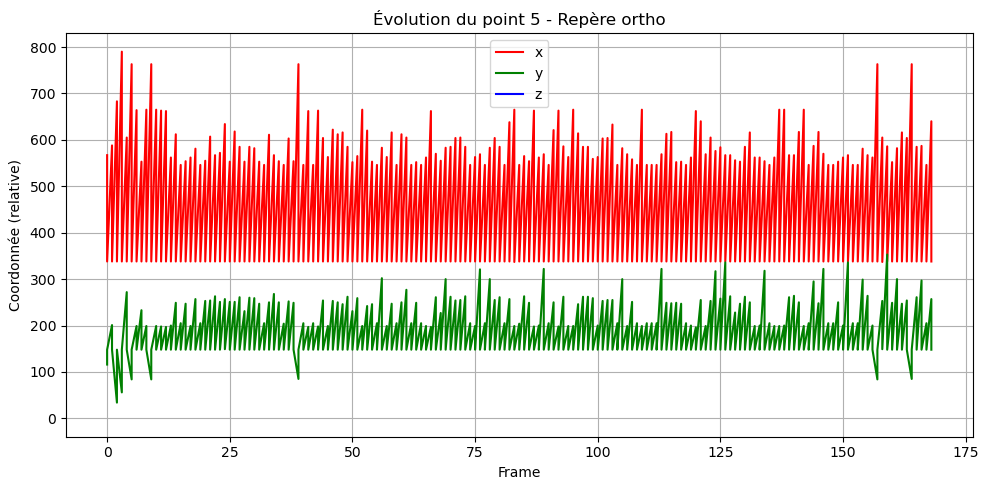

In [88]:
plot_keypoint_evolution(df, keypoint_id=5, use_ortho=True, x=True, y=True, z=True)

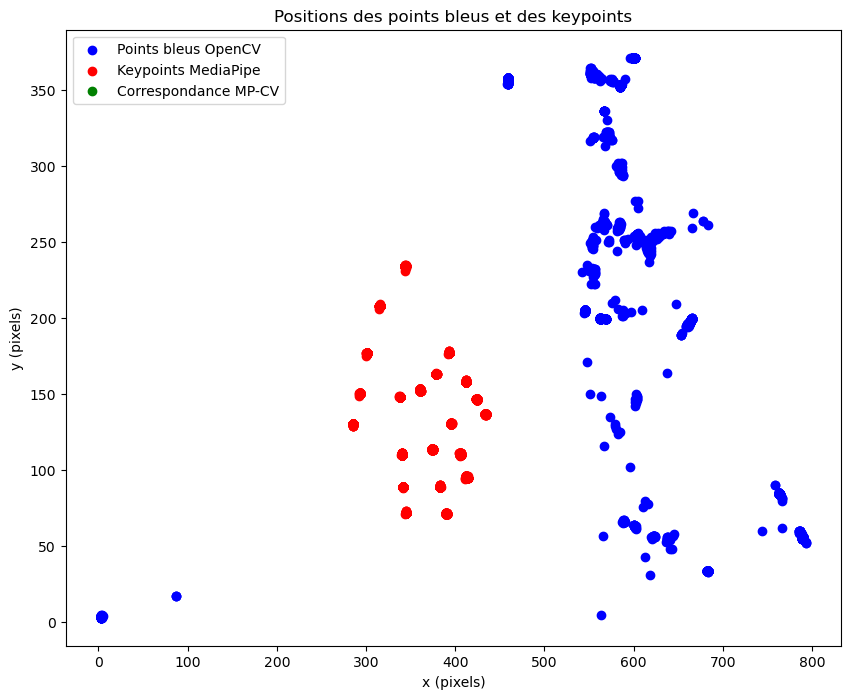

In [92]:
# Graphique des points
plt.figure(figsize=(10, 8))
plt.scatter(df[df['Type'] == 'CV']['x'], df[df['Type'] == 'CV']['y'], c='blue', label='Points bleus OpenCV')
plt.scatter(df[df['Type'] == 'MP']['x'], df[df['Type'] == 'MP']['y'], c='red', label='Keypoints MediaPipe')
plt.scatter(df[df['Type'] == 'MP-CV']['x'], df[df['Type'] == 'MP-CV']['y'], c='green', label='Correspondance MP-CV')
plt.xlabel('x (pixels)')
plt.ylabel('y (pixels)')
plt.title('Positions des points bleus et des keypoints')
plt.legend()
plt.show()

# Sauvegarde des données
df.to_csv('precision_rapport.csv', index=False)

red
5
green
6


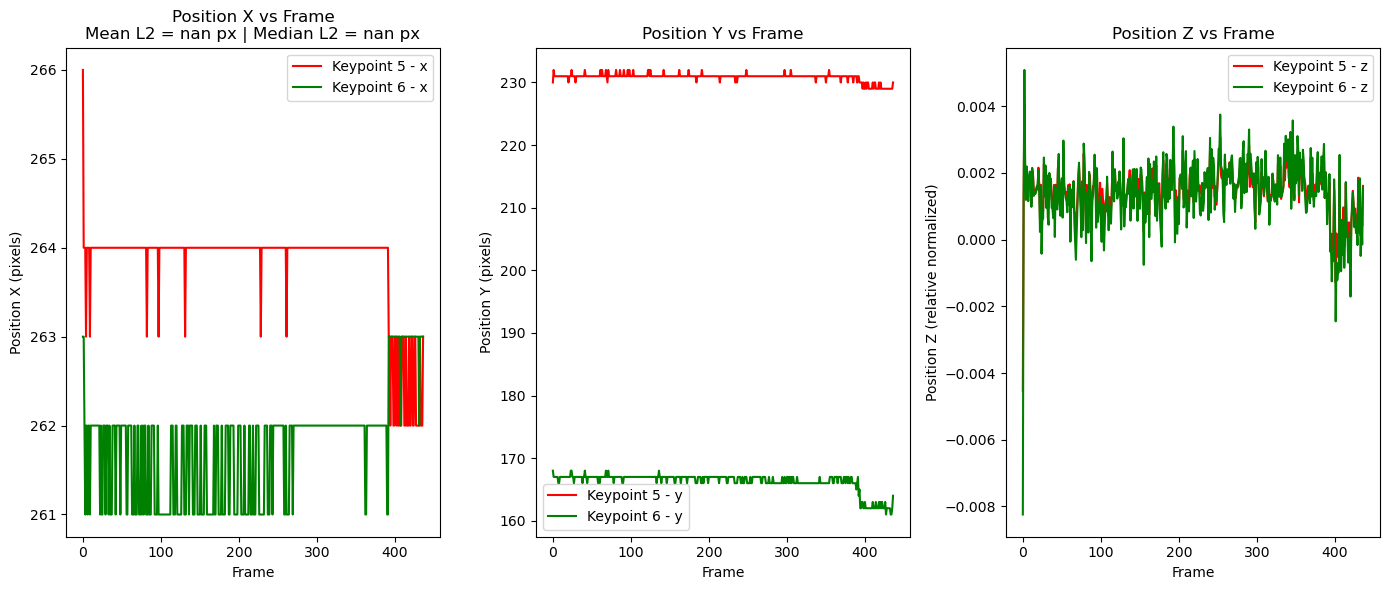

red
9
green
10


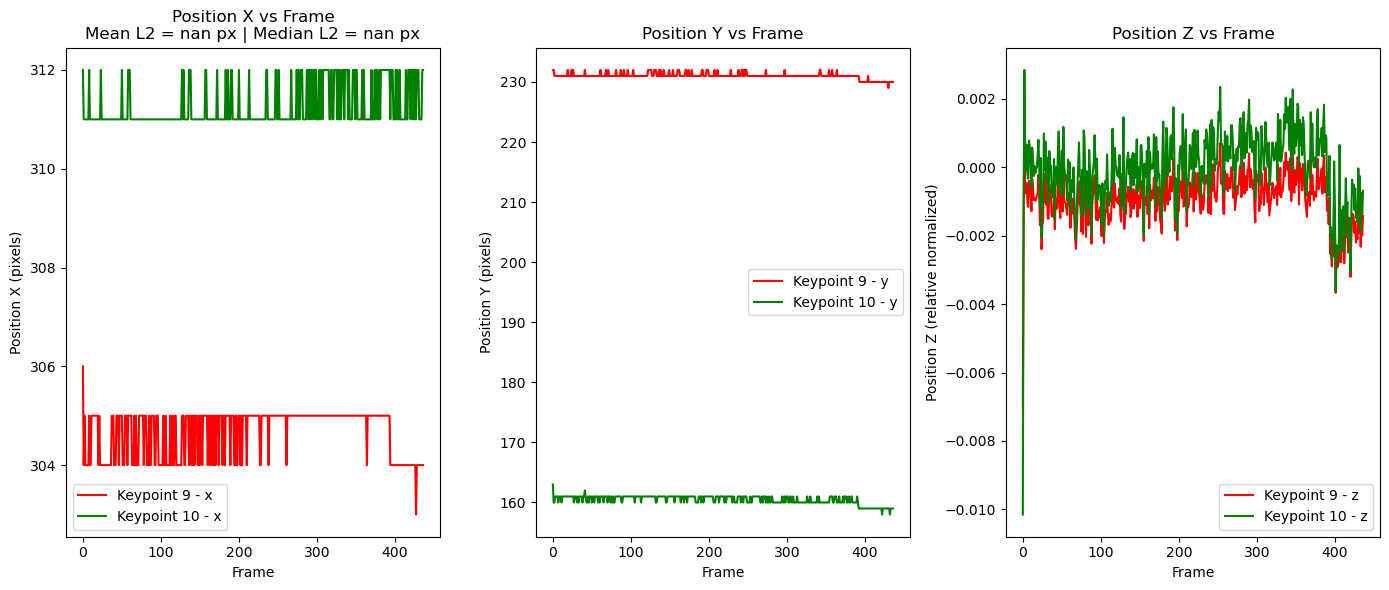

In [131]:
plot_keypoints_vs_blue(df,5,6, False)
plot_keypoints_vs_blue(df,9,10, False)

In [25]:
df.head()

,Frame,Relative Time (s),Montreal Time,Type,Point_ID,x,y,L2_Error
0,3,0.7196,2025-04-28 15:54:42.796047-04:00,CV,0,660,4,NaN
1,7,0.9134,2025-04-28 15:54:42.989905-04:00,CV,0,658,3,NaN
2,11,1.0867,2025-04-28 15:54:43.163142-04:00,CV,0,660,4,NaN
3,25,1.6850,2025-04-28 15:54:43.761439-04:00,CV,0,659,3,NaN
4,26,1.7285,2025-04-28 15:54:43.804963-04:00,CV,0,658,3,NaN


In [117]:
test="./result/live/z/double/z.csv"
df = pd.read_csv(test)

In [ ]:
display(df)

In [78]:
import cv2
import mediapipe as mp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from datetime import datetime
import pytz


mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=2, min_detection_confidence=0.5)
cap = cv2.VideoCapture(1)

results_data = []
max_distance = 50

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
fps = 20.0
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
video_writer = cv2.VideoWriter('tracking_output.mp4', fourcc, fps, (width, height))

start_time = time.time()
frame_idx = 0

while cap.isOpened():
    success, frame = cap.read()
    if not success:
        break

    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    lower_blue = np.array([100, 100, 50])
    upper_blue = np.array([140, 255, 155])
    mask = cv2.inRange(hsv, lower_blue, upper_blue)
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    blue_points = []
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        if 5 < w < 30 and 5 < h < 30:
            cx, cy = x + w // 2, y + h // 2
            blue_points.append((cx, cy))
            cv2.circle(frame, (cx, cy), 5, (0, 0, 255), -1)

    relative_time = time.time() - start_time
    montreal_time = datetime.now(pytz.timezone('America/Montreal'))

    for idx, cv_point in enumerate(blue_points):
        results_data.append({
            "Frame": frame_idx,
            "Relative Time (s)": relative_time,
            "Montreal Time": montreal_time,
            'Type': 'CV',
            'Point_ID': idx,
            'x': cv_point[0],
            'y': cv_point[1],
            'z': None,
            'L2_Error': None,
            'L2_xy': None,
            'L2_xyz': None,
            'L2_z': None
        })

    image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = hands.process(image_rgb)
    mediapipe_points = []
    mediapipe_landmarks_list = []

    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            hand_landmark_points = []
            for i, lm in enumerate(hand_landmarks.landmark):
                h, w, _ = frame.shape
                cx, cy = int(lm.x * w), int(lm.y * h)
                mediapipe_points.append((cx, cy))
                hand_landmark_points.append((lm.x, lm.y, lm.z))
                cv2.circle(frame, (cx, cy), 5, (255, 0, 0), -1)
            mediapipe_landmarks_list.append(hand_landmark_points)

    if mediapipe_points and blue_points and results.multi_hand_landmarks:
        for hand_idx, hand_landmarks in enumerate(results.multi_hand_landmarks):
            for mp_idx, lm in enumerate(hand_landmarks.landmark):
                mp_point_px = (int(lm.x * width), int(lm.y * height))
                min_distance = float('inf')
                closest_cv_point = None
                for cv_point in blue_points:
                    distance = np.sqrt((mp_point_px[0] - cv_point[0]) ** 2 + (mp_point_px[1] - cv_point[1]) ** 2)
                    if distance < min_distance:
                        min_distance = distance
                        closest_cv_point = cv_point
                if closest_cv_point and min_distance <= max_distance:
                    results_data.append({
                        "Frame": frame_idx,
                        "Relative Time (s)": relative_time,
                        "Montreal Time": montreal_time,
                        'Type': 'MP-CV',
                        'Point_ID': mp_idx,
                        'x': mp_point_px[0],
                        'y': mp_point_px[1],
                        'z': lm.z,
                        'L2_Error': min_distance,
                        'L2_xy': None,
                        'L2_xyz': None,
                        'L2_z': None
                    })
                    if min_distance < 10:
                        cv2.circle(frame, mp_point_px, 5, (0, 255, 255), -1)

    if mediapipe_landmarks_list:
        for landmarks in mediapipe_landmarks_list:
            rel_coords, ortho_coords = get_hand_local_coords(landmarks)
            for i, (rel, ortho) in enumerate(zip(rel_coords, ortho_coords)):
                l2_xy = np.sqrt((rel[0] - rel_coords[5][0]) ** 2 + (rel[1] - rel_coords[5][1]) ** 2) if i == 6 else None
                l2_xyz = np.linalg.norm(rel - rel_coords[5]) if i == 6 else None
                l2_z = abs(rel[2] - rel_coords[5][2]) if i == 6 else None

                results_data.append({
                    "Frame": frame_idx,
                    "Relative Time (s)": relative_time,
                    "Montreal Time": montreal_time,
                    'Type': 'REL',
                    'Point_ID': i,
                    'x': rel[0],
                    'y': rel[1],
                    'z': rel[2],
                    'L2_Error': l2_xyz,
                    'L2_xy': l2_xy,
                    'L2_xyz': l2_xyz,
                    'L2_z': l2_z
                })

                results_data.append({
                    "Frame": frame_idx,
                    "Relative Time (s)": relative_time,
                    "Montreal Time": montreal_time,
                    'Type': 'ORT',
                    'Point_ID': i,
                    'x': ortho[0],
                    'y': ortho[1],
                    'z': ortho[2],
                    'L2_Error': l2_xyz,
                    'L2_xy': l2_xy,
                    'L2_xyz': l2_xyz,
                    'L2_z': l2_z
                })

    cv2.imshow('Hand Tracking - Blue Marker Detection', frame)
    cv2.imshow('Mask Bleu', mask)
    video_writer.write(frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    frame_idx += 1

cap.release()
video_writer.release()
cv2.destroyAllWindows()

dfn = pd.DataFrame(results_data)
print(dfn.head())

   Frame  Relative Time (s)                    Montreal Time Type  Point_ID  \
0      0           0.366825 2025-05-09 16:45:31.140094-04:00   CV         0   
1      0           0.366825 2025-05-09 16:45:31.140094-04:00   CV         1   
2      0           0.366825 2025-05-09 16:45:31.140094-04:00   CV         2   
3      0           0.366825 2025-05-09 16:45:31.140094-04:00   CV         3   
4      0           0.366825 2025-05-09 16:45:31.140094-04:00   CV         4   

       x      y   z  L2_Error  L2_xy  L2_xyz  L2_z  
0  600.0  372.0 NaN       NaN    NaN     NaN   NaN  
1  589.0  371.0 NaN       NaN    NaN     NaN   NaN  
2  462.0  363.0 NaN       NaN    NaN     NaN   NaN  
3  563.0  344.0 NaN       NaN    NaN     NaN   NaN  
4  555.0  262.0 NaN       NaN    NaN     NaN   NaN  


In [79]:
dfn.to_csv('precision_rapport.csv', index=False)

In [80]:

# Centralisation 
def plot_relative_coords_two_points(df, point_id1, point_id2, x=True, y=True, z=True):
    subset1 = df[(df['Type'] == 'REL') & (df['Point_ID'] == point_id1)]
    subset2 = df[(df['Type'] == 'REL') & (df['Point_ID'] == point_id2)]
    time = subset1["Relative Time (s)"]

    plt.figure(figsize=(12, 5))
    if x:
        plt.plot(time, subset1['x'], label=f'x_rel_{point_id1}')
        plt.plot(time, subset2['x'], label=f'x_rel_{point_id2}')
    if y:
        plt.plot(time, subset1['y'], label=f'y_rel_{point_id1}')
        plt.plot(time, subset2['y'], label=f'y_rel_{point_id2}')
    if z:
        plt.plot(time, subset1['z'], label=f'z_rel_{point_id1}')
        plt.plot(time, subset2['z'], label=f'z_rel_{point_id2}')

    plt.title(f'Évolution des coordonnées relatives - points {point_id1} et {point_id2}')
    plt.xlabel('Temps (s)')
    plt.ylabel('Coordonnée')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [81]:
# Gram-Schmidt 
def plot_orthogonal_coords_two_points(df, point_id1, point_id2, x=True, y=True, z=True):
    subset1 = df[(df['Type'] == 'ORT') & (df['Point_ID'] == point_id1)]
    subset2 = df[(df['Type'] == 'ORT') & (df['Point_ID'] == point_id2)]
    time = subset1["Relative Time (s)"]

    plt.figure(figsize=(12, 5))
    if x:
        plt.plot(time, subset1['x'], label=f'x_ortho_{point_id1}')
        plt.plot(time, subset2['x'], label=f'x_ortho_{point_id2}')
    if y:
        plt.plot(time, subset1['y'], label=f'y_ortho_{point_id1}')
        plt.plot(time, subset2['y'], label=f'y_ortho_{point_id2}')
    if z:
        plt.plot(time, subset1['z'], label=f'z_ortho_{point_id1}')
        plt.plot(time, subset2['z'], label=f'z_ortho_{point_id2}')

    plt.title(f'Évolution des coordonnées orthogonales - points {point_id1} et {point_id2}')
    plt.xlabel('Temps (s)')
    plt.ylabel('Coordonnée')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [82]:
dfn.head()

,Frame,Relative Time (s),Montreal Time,Type,Point_ID,x,y,z,L2_Error,L2_xy,L2_xyz,L2_z
0,0,0.366825,2025-05-09 16:45:31.140094-04:00,CV,0,600.0,372.0,NaN,NaN,NaN,NaN,NaN
1,0,0.366825,2025-05-09 16:45:31.140094-04:00,CV,1,589.0,371.0,NaN,NaN,NaN,NaN,NaN
2,0,0.366825,2025-05-09 16:45:31.140094-04:00,CV,2,462.0,363.0,NaN,NaN,NaN,NaN,NaN
3,0,0.366825,2025-05-09 16:45:31.140094-04:00,CV,3,563.0,344.0,NaN,NaN,NaN,NaN,NaN
4,0,0.366825,2025-05-09 16:45:31.140094-04:00,CV,4,555.0,262.0,NaN,NaN,NaN,NaN,NaN


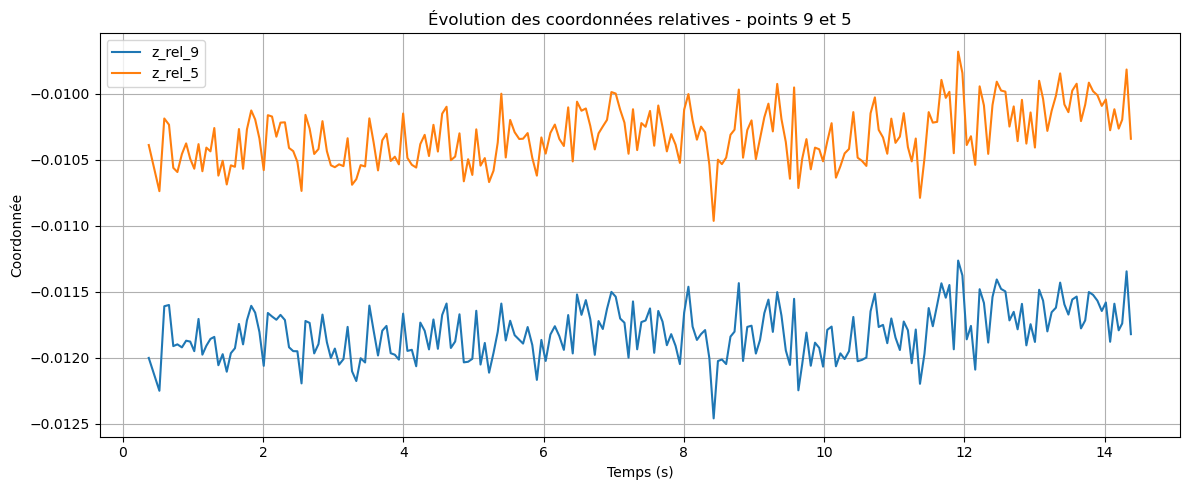

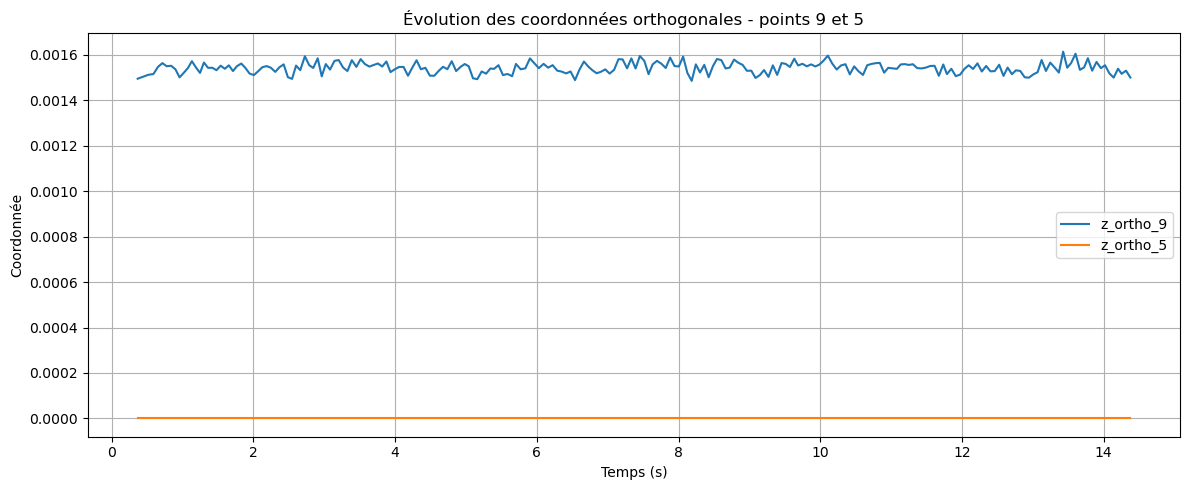

In [83]:
plot_relative_coords_two_points(dfn, point_id1=9, point_id2=5, x=False, y=False, z=True)

plot_orthogonal_coords_two_points(dfn, point_id1=9, point_id2=5, x=False, y=False, z=True)


In [152]:
keypoint1 = 5
keypoint2 = 6
distance_df, mean, mediane, maximum, minimum, ecart_type = compute_l2(dfn, keypoint1, keypoint2)

ref_en_pixel = 130
ref_en_mm = 100

if distance_df is not None:
  print(f"DataFrame des distances L2 entre le point clé {keypoint1} et {keypoint2}:")
  print(distance_df.head())
    
  print(f"\nMoyenne de la distance L2: {mean:.2f} pixel soit {pixels_vers_mm(mean, ref_en_pixel, ref_en_mm):.2f} mm")
  print(f"\nMédiane de la distance L2: {mediane:.2f} pixel soit {pixels_vers_mm(mediane, ref_en_pixel, ref_en_mm):.2f} mm")
  print(f"Maximum de la distance L2: {maximum:.2f} pixel soit {pixels_vers_mm(maximum, ref_en_pixel, ref_en_mm):.2f} mm")
  print(f"Minimum de la distance L2: {minimum:.2f} pixel soit {pixels_vers_mm(minimum, ref_en_pixel, ref_en_mm):.2f} mm")
  print(f"Écart-type de la distance L2: {ecart_type:.2f} pixel soit {pixels_vers_mm(ecart_type, ref_en_pixel, ref_en_mm):.2f} mm")

DataFrame des distances L2 entre le point clé 5 et 6:
   Frame  Distance_L2
0      0       0.1312
1      0       0.4632
2      0       0.4428
3      0       0.1322
4      1       0.1500


NameError: name 'pixels_vers_mm' is not defined

In [38]:
def compute_l2_distance_stats(df, kp1, kp2, scale_x_mm_per_px=1.0, scale_y_mm_per_px=1.0):
    distances = []
    info_rows = []

    grouped = df.groupby('Frame')
    for frame_id, group in grouped:
        p1 = group[group['Point_ID'] == kp1]
        p2 = group[group['Point_ID'] == kp2]
        
        if len(p1) == 1 and len(p2) == 1:
            x1, y1, z1 = float(p1['x']), float(p1['y']), float(p1['z'])
            x2, y2, z2 = float(p2['x']), float(p2['y']), float(p2['z'])
            
            # Conversion mm (si les coordonnées sont en pixels)
            dx = (x1 - x2) * scale_x_mm_per_px
            dy = (y1 - y2) * scale_y_mm_per_px
            dz = (z1 - z2)  # z est déjà normalisé entre 0 et 1 ou dans une échelle relative

            dist = np.sqrt(dx**2 + dy**2 + dz**2)
            distances.append(dist)
            info_rows.append((frame_id, dist, p1, p2))

    distances = np.array(distances)

    if len(distances) == 0:
        return {"error": "Aucune donnée trouvée pour les keypoints sélectionnés."}

    # Trouver la min et max
    min_idx = np.argmin(distances)
    max_idx = np.argmax(distances)
    
    stats = {
        "mean": np.mean(distances),
        "median": np.median(distances),
        "std": np.std(distances),
        "min": distances[min_idx],
        "min_info": {
            "frame": info_rows[min_idx][0],
            "kp1": info_rows[min_idx][2],
            "kp2": info_rows[min_idx][3]
        },
        "max": distances[max_idx],
        "max_info": {
            "frame": info_rows[max_idx][0],
            "kp1": info_rows[max_idx][2],
            "kp2": info_rows[max_idx][3]
        },
        "count": len(distances)
    }

    return stats


In [40]:
stats = compute_l2_distance_stats(dfn[dfn["Type"] == "ORT"], kp1=5, kp2=6, scale_x_mm_per_px=0.264, scale_y_mm_per_px=0.264)
print(stats)

C:\Users\Administrateur\AppData\Local\Temp\ipykernel_19208\3986203850.py:11: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x1, y1, z1 = float(p1['x']), float(p1['y']), float(p1['z'])
C:\Users\Administrateur\AppData\Local\Temp\ipykernel_19208\3986203850.py:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x2, y2, z2 = float(p2['x']), float(p2['y']), float(p2['z'])


{'mean': 0.037238857755152066, 'median': 0.035859713067196174, 'std': 0.006167446419195813, 'min': 0.022577274432628244, 'min_info': {'frame': 207, 'kp1':        Frame  Relative Time (s)                    Montreal Time Type  \
10089    207            12.9266 2025-05-05 10:08:44.473237-04:00  ORT   

       Point_ID      x       y       z  L2_Error  L2_xy  L2_xyz  L2_z  
10089         5 0.2644 -0.0000 -0.0000       NaN    NaN     NaN   NaN  , 'kp2':        Frame  Relative Time (s)                    Montreal Time Type  \
10091    207            12.9266 2025-05-05 10:08:44.473237-04:00  ORT   

       Point_ID      x      y      z  L2_Error  L2_xy  L2_xyz   L2_z  
10091         6 0.3455 0.0187 0.0051    0.0834 0.0834  0.0834 0.0009  }, 'max': 0.05043947977581029, 'max_info': {'frame': 440, 'kp1':        Frame  Relative Time (s)                    Montreal Time Type  \
21371    440            26.8046 2025-05-05 10:08:58.351226-04:00  ORT   

       Point_ID      x       y      z  L2_Erro

In [29]:
import cv2

for i in range(5):
    cap = cv2.VideoCapture(i)
    if cap.isOpened():
        print(f"Camera {i} is available.")
    cap.release()

Camera 0 is available.
Camera 1 is available.
